### images, labels를 다 만들었으면 파일 개수가 똑같은지 확인하기

### resize 사이즈는 640, 480 or 640 640

In [2]:
# 현재 경로 확인

import os

print(os.getcwd())

c:\Users\YJKIM_PC\yolo11


In [3]:
# 파일 개수 똑같은지 확인하는 코드

train_path = os.path.join(os.getcwd(), 'yolo custom dataset', 'train')
train_images = os.path.join(train_path, 'images')
train_labels = os.path.join(train_path, 'labels')

train_count = 0

for image in os.listdir(train_images):
    for label in os.listdir(train_labels):
        if image.split('.')[0] == label.split('.')[0]:
            train_count += 1
            break
if train_count != len(os.listdir(train_images)):
    print(train_count, len(os.listdir(train_images)))
    print('train 이미지와 레이블의 개수가 맞지 않습니다.')
else:
    print('train 이미지와 레이블의 개수가 같습니다.')
    print(train_count, len(os.listdir(train_images)))

valid_path = os.path.join(os.getcwd(), 'yolo custom dataset', 'valid')
valid_images = os.path.join(valid_path, 'images')
valid_labels = os.path.join(valid_path, 'labels')

valid_count = 0

for image in os.listdir(valid_images):
    for label in os.listdir(valid_labels):
        if image.split('.')[0] == label.split('.')[0]:
            valid_count += 1
            break
if valid_count != len(os.listdir(valid_images)):
    print(train_count, len(os.listdir(valid_images)))
    print('valid 이미지와 레이블의 개수가 맞지 않습니다.')
else:
    print('valid 이미지와 레이블의 개수가 같습니다.')
    print(valid_count, len(os.listdir(valid_images)))

test_path = os.path.join(os.getcwd(), 'yolo custom dataset', 'test')
test_images = os.path.join(test_path, 'images')
test_labels = os.path.join(test_path, 'labels')

test_count = 0

for image in os.listdir(test_images):
    for label in os.listdir(test_labels):
        if image.split('.')[0] == label.split('.')[0]:
            test_count += 1
            break
if test_count != len(os.listdir(test_images)):
    print(test_count, len(os.listdir(test_images)))
    print('test 이미지와 레이블의 개수가 맞지 않습니다.')
else:
    print('test 이미지와 레이블의 개수가 같습니다.')
    print(test_count, len(os.listdir(test_images)))

train 이미지와 레이블의 개수가 같습니다.
65 65
valid 이미지와 레이블의 개수가 같습니다.
28 28
test 이미지와 레이블의 개수가 같습니다.
22 22


In [3]:
# 증강 안 한 데이터로 학습

import torch
from ultralytics import YOLO

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = YOLO('yolo11n.pt')

results = model.train(data='./data.yaml', epochs=150, imgsz=640, device=device, batch=4)

Ultralytics 8.3.9  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=./data.yaml, epochs=150, time=None, patience=100, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_b

train: Scanning C:\Users\YJKIM_PC\yolo11\yolo custom dataset\train\labels.cache... 66 images, 0 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\YJKIM_PC\yolo11\yolo custom dataset\valid\labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs\detect\train12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train12
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150     0.698G     0.5772      3.334     0.9783          5        640: 100%|██████████| 17/17 [00:11<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.08it/s]

                   all         28         36    0.00388       0.91      0.312      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150     0.698G     0.5741      2.799     0.9981          3        640: 100%|██████████| 17/17 [00:01<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.60it/s]

                   all         28         36    0.00477      0.979      0.561      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150     0.682G     0.6666      2.516      1.025          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.27it/s]

                   all         28         36      0.964      0.274      0.698       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150     0.698G     0.6912       2.27       1.04          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.74it/s]

                   all         28         36          1      0.121      0.701      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150     0.684G     0.7602      2.058      1.062          6        640: 100%|██████████| 17/17 [00:01<00:00, 11.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.30it/s]

                   all         28         36      0.621      0.281      0.555      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150     0.682G     0.7107      1.921       1.04          6        640: 100%|██████████| 17/17 [00:01<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.09it/s]

                   all         28         36       0.75      0.329       0.43      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150     0.696G     0.7241      1.782      1.077          9        640: 100%|██████████| 17/17 [00:01<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.29it/s]

                   all         28         36      0.811      0.493       0.62      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150     0.698G     0.8022       1.87      1.051          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.91it/s]

                   all         28         36      0.737      0.671      0.641      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150     0.684G     0.7152      2.004      1.041          3        640: 100%|██████████| 17/17 [00:01<00:00, 12.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.17it/s]

                   all         28         36      0.657      0.705      0.737       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150     0.682G     0.6179      1.669     0.9382          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.54it/s]

                   all         28         36      0.509      0.712      0.561      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150     0.682G     0.6564      1.623     0.9634          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.05it/s]

                   all         28         36      0.754      0.676      0.767      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150     0.682G     0.5797      1.596     0.9363          5        640: 100%|██████████| 17/17 [00:01<00:00, 12.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.17it/s]

                   all         28         36      0.748       0.87      0.822      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150     0.682G     0.6507       1.56     0.9771          6        640: 100%|██████████| 17/17 [00:01<00:00, 11.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.81it/s]

                   all         28         36      0.742      0.696      0.794       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150     0.682G     0.6787      1.717      0.993          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.85it/s]

                   all         28         36      0.779      0.637      0.759      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150     0.682G     0.6237      1.495     0.9619          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.81it/s]

                   all         28         36       0.75      0.701      0.774      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150     0.684G     0.5668      1.415     0.9213          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.60it/s]

                   all         28         36       0.87      0.854        0.9      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150     0.684G     0.6167      1.543     0.9701          1        640: 100%|██████████| 17/17 [00:01<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.07it/s]

                   all         28         36      0.941      0.924      0.954      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150     0.682G     0.5766      1.315     0.9219          7        640: 100%|██████████| 17/17 [00:01<00:00, 11.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.87it/s]

                   all         28         36      0.954      0.924      0.944      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150     0.682G     0.5334      1.331     0.9173          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.17it/s]

                   all         28         36      0.894      0.905      0.946      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150     0.684G     0.6012      1.305     0.9883          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.53it/s]

                   all         28         36      0.812      0.775      0.872      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150     0.684G     0.5791      1.234     0.9711          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.74it/s]

                   all         28         36      0.772      0.784      0.839       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150     0.684G     0.5432      1.293     0.9475          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.85it/s]

                   all         28         36      0.883      0.903      0.937      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150     0.696G     0.5384      1.225      0.938          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.81it/s]

                   all         28         36      0.852      0.916      0.946      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150     0.698G     0.6095      1.228     0.9663          8        640: 100%|██████████| 17/17 [00:01<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.21it/s]

                   all         28         36      0.805      0.835      0.852      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150     0.684G     0.5361      1.257     0.9241          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.61it/s]

                   all         28         36      0.791      0.814      0.867       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150     0.682G     0.5151      1.289     0.9394          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.30it/s]

                   all         28         36      0.864      0.829      0.914      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150     0.682G     0.4673      1.185     0.8618          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.78it/s]

                   all         28         36      0.835      0.903      0.935      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150     0.682G     0.5406      1.144     0.9281          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.26it/s]

                   all         28         36       0.82      0.875       0.93      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150     0.682G     0.5461      1.109     0.9155          6        640: 100%|██████████| 17/17 [00:01<00:00, 12.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.09it/s]

                   all         28         36      0.801      0.861      0.946       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150     0.682G      0.606      1.285     0.9912          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.32it/s]

                   all         28         36       0.89      0.861      0.952      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150     0.682G     0.5843      1.236     0.9623          5        640: 100%|██████████| 17/17 [00:01<00:00, 12.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.46it/s]

                   all         28         36      0.901      0.932      0.971      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150     0.684G     0.5485      1.284     0.9273          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.61it/s]

                   all         28         36      0.972      0.889       0.96       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150     0.684G      0.578      1.202      0.942          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.13it/s]

                   all         28         36      0.934      0.937       0.97      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150     0.684G     0.5838      1.118     0.9459          7        640: 100%|██████████| 17/17 [00:01<00:00, 11.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.31it/s]

                   all         28         36      0.961       0.92      0.965      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150     0.682G       0.55      1.125      0.943          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.37it/s]

                   all         28         36      0.938      0.919      0.976       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150     0.682G     0.4788      1.066     0.9013          6        640: 100%|██████████| 17/17 [00:01<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.84it/s]

                   all         28         36      0.927      0.907      0.976      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150     0.682G     0.5406      1.062     0.9399          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.07it/s]

                   all         28         36      0.941      0.944      0.972      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150     0.682G     0.5949      1.065     0.9842          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.35it/s]

                   all         28         36      0.954       0.91      0.979      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150     0.696G     0.5213      1.054     0.9333          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.82it/s]

                   all         28         36      0.924      0.963      0.984      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150     0.698G     0.6242      1.026      1.013          6        640: 100%|██████████| 17/17 [00:01<00:00, 11.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.30it/s]

                   all         28         36      0.935      0.947      0.977      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150     0.682G     0.5166      1.026     0.9322          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.21it/s]

                   all         28         36      0.937      0.943      0.975      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150     0.682G     0.4823     0.9927     0.8971          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.30it/s]

                   all         28         36      0.939      0.953      0.977      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150     0.682G     0.4937      1.044     0.8998          5        640: 100%|██████████| 17/17 [00:01<00:00, 12.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.37it/s]

                   all         28         36      0.941      0.948      0.978      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150     0.682G     0.5103     0.9512     0.9164          6        640: 100%|██████████| 17/17 [00:01<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.50it/s]

                   all         28         36      0.915      0.988      0.985      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150     0.684G     0.5154     0.9725     0.9313          6        640: 100%|██████████| 17/17 [00:01<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.13it/s]

                   all         28         36      0.963      0.936      0.982      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150     0.682G     0.5117     0.9737     0.9171          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.23it/s]

                   all         28         36      0.917      0.923      0.949      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150     0.682G     0.5337     0.9395      0.954          9        640: 100%|██████████| 17/17 [00:01<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.68it/s]

                   all         28         36      0.855      0.926      0.932      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150     0.682G      0.526     0.9879     0.9685          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.35it/s]

                   all         28         36      0.914      0.929      0.935      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150     0.682G     0.5547     0.9898     0.9845          6        640: 100%|██████████| 17/17 [00:01<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.75it/s]

                   all         28         36      0.926      0.934      0.942      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150     0.682G     0.5046     0.8981     0.9163          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.18it/s]

                   all         28         36      0.922      0.944      0.957      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150     0.684G     0.4907     0.9319     0.9561          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.74it/s]

                   all         28         36      0.897      0.944      0.968      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150     0.684G     0.4435     0.9534     0.8911          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.79it/s]

                   all         28         36      0.856      0.924      0.952       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150     0.684G     0.5472      1.016     0.9952          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.05it/s]

                   all         28         36      0.856      0.882      0.928      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150     0.682G     0.4855     0.8604        0.9          8        640: 100%|██████████| 17/17 [00:01<00:00, 12.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.04it/s]

                   all         28         36      0.874      0.936       0.91       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150     0.698G     0.5594     0.9152     0.9762          1        640: 100%|██████████| 17/17 [00:01<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 20.20it/s]

                   all         28         36      0.873      0.924      0.905      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       0.7G     0.4263     0.8469     0.8784          3        640: 100%|██████████| 17/17 [00:01<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.47it/s]

                   all         28         36        0.9      0.924       0.94      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150     0.682G     0.4655      0.846      0.905          5        640: 100%|██████████| 17/17 [00:01<00:00, 12.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.00it/s]

                   all         28         36      0.932      0.928      0.948       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150     0.682G     0.4464     0.8304     0.9066          4        640: 100%|██████████| 17/17 [00:01<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.46it/s]

                   all         28         36      0.924      0.923      0.943      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150     0.684G     0.5045     0.9413     0.9524          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.16it/s]

                   all         28         36      0.888        0.9      0.925      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150     0.682G      0.449     0.9859     0.9244          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.76it/s]

                   all         28         36       0.89      0.908      0.907       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150     0.682G     0.4129     0.7849     0.9091          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 11.94it/s]

                   all         28         36      0.903      0.912      0.938      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150     0.684G       0.42     0.7762     0.8801          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.89it/s]

                   all         28         36      0.934      0.914      0.945      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150     0.684G     0.4554     0.8883     0.9389          8        640: 100%|██████████| 17/17 [00:01<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.92it/s]

                   all         28         36      0.957      0.926      0.946      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150     0.684G     0.4152      0.742     0.9018          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.18it/s]

                   all         28         36      0.941      0.925      0.952      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150     0.682G      0.437     0.7881     0.9016          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.40it/s]

                   all         28         36      0.932      0.922      0.942      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150     0.684G     0.3868     0.7796     0.8753          6        640: 100%|██████████| 17/17 [00:01<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.83it/s]

                   all         28         36      0.924       0.88       0.93       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150     0.684G     0.4001     0.7898     0.8821          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.67it/s]

                   all         28         36      0.928      0.924      0.937      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150     0.682G     0.4142     0.7918     0.8998          6        640: 100%|██████████| 17/17 [00:01<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.89it/s]

                   all         28         36      0.903      0.924      0.911      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150     0.682G     0.4345     0.8463     0.8913          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.18it/s]

                   all         28         36      0.895      0.924      0.929      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150     0.684G     0.4341     0.7091     0.9049          6        640: 100%|██████████| 17/17 [00:01<00:00,  9.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.56it/s]

                   all         28         36      0.923      0.924      0.933      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150     0.698G     0.4357     0.8211     0.8987          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.88it/s]

                   all         28         36      0.958       0.91      0.942      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150     0.698G     0.4176     0.7321     0.8925          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.07it/s]

                   all         28         36      0.958      0.915      0.943      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150     0.684G     0.3971      0.703     0.9057          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.27it/s]

                   all         28         36      0.948      0.924      0.954       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150     0.684G     0.4051     0.6778     0.8692          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.15it/s]

                   all         28         36      0.927      0.927      0.946      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150     0.684G     0.4297     0.7622     0.9202          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.06it/s]

                   all         28         36      0.927      0.926      0.945      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150     0.684G     0.3916     0.7574      0.877          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.45it/s]

                   all         28         36      0.916      0.923      0.955      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150     0.684G     0.3734     0.6926     0.8489          3        640: 100%|██████████| 17/17 [00:01<00:00, 12.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.62it/s]

                   all         28         36      0.864      0.905       0.95      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150     0.682G     0.4467     0.7257     0.9175          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.42it/s]

                   all         28         36       0.82      0.903      0.915      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150     0.684G     0.3619     0.6784     0.8631          5        640: 100%|██████████| 17/17 [00:01<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.62it/s]

                   all         28         36      0.849      0.855       0.89      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150     0.682G      0.436     0.7759     0.9269          2        640: 100%|██████████| 17/17 [00:01<00:00, 12.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.29it/s]

                   all         28         36      0.852       0.88      0.917      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150     0.682G     0.3806     0.7083     0.8788          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.57it/s]

                   all         28         36      0.925      0.892      0.942      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150     0.682G     0.4018      0.685     0.8672          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.42it/s]

                   all         28         36      0.959      0.924      0.947      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150     0.682G     0.4247     0.7712     0.9292          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.09it/s]

                   all         28         36      0.963      0.924       0.94      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150     0.682G     0.3836     0.6618     0.8589          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.15it/s]

                   all         28         36      0.963      0.924      0.942      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150     0.682G     0.4206     0.6585     0.8818          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.47it/s]

                   all         28         36      0.952      0.924       0.94       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150     0.682G     0.4434     0.6508     0.9329          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.39it/s]

                   all         28         36      0.931      0.925       0.93       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150     0.696G     0.3912     0.6475     0.8851          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.94it/s]

                   all         28         36      0.927      0.924      0.929      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150     0.698G     0.3866      0.694     0.8692          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.30it/s]

                   all         28         36      0.937      0.925       0.93      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150     0.684G     0.3967     0.5975     0.8826          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.49it/s]

                   all         28         36      0.967      0.944      0.931      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150     0.682G     0.3827      0.692     0.8758          6        640: 100%|██████████| 17/17 [00:01<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.10it/s]

                   all         28         36      0.971      0.944      0.933      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150     0.682G     0.3719     0.6548      0.866          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.07it/s]

                   all         28         36      0.962      0.944       0.93      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150     0.684G     0.3878     0.6071     0.8867          7        640: 100%|██████████| 17/17 [00:01<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.61it/s]

                   all         28         36      0.951      0.939      0.931      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150     0.682G     0.3555     0.6323     0.8912          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.52it/s]

                   all         28         36      0.956      0.917      0.929      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150     0.682G     0.4234     0.6495     0.8977          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.95it/s]

                   all         28         36      0.937      0.925      0.926        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150     0.682G     0.3393     0.6187     0.8573          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.80it/s]

                   all         28         36      0.937      0.926      0.928        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150     0.682G     0.3623     0.5852     0.8826          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.35it/s]

                   all         28         36      0.931       0.93      0.936      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150     0.684G     0.4058     0.6491     0.9233          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.81it/s]

                   all         28         36       0.93      0.934      0.948      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150     0.682G     0.4181     0.6405     0.9122          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.84it/s]

                   all         28         36      0.971       0.92       0.95       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150     0.684G     0.3545     0.6433       0.87          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.32it/s]

                   all         28         36       0.97      0.919       0.96      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150     0.682G     0.3243     0.5847     0.8461          6        640: 100%|██████████| 17/17 [00:01<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.44it/s]

                   all         28         36       0.97      0.919      0.964      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150     0.682G     0.3794     0.5807     0.8832          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.71it/s]

                   all         28         36      0.964      0.919      0.964      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150     0.682G     0.3967     0.6125     0.9263          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.01it/s]

                   all         28         36      0.933      0.941      0.964       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150     0.696G     0.3346     0.5871     0.8751          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.01it/s]

                   all         28         36      0.955      0.919      0.966      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150     0.698G     0.3457     0.5953     0.8604          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.15it/s]

                   all         28         36      0.961      0.917      0.963      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150     0.682G     0.3664     0.5721      0.904          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.34it/s]

                   all         28         36      0.964      0.917      0.966       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150     0.684G     0.3188     0.5497     0.8364          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.86it/s]

                   all         28         36      0.962      0.908      0.968      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150     0.684G     0.3787     0.5727     0.8842          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.59it/s]

                   all         28         36      0.927       0.92      0.967       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150     0.684G     0.3548     0.5327     0.9078          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.22it/s]

                   all         28         36      0.963      0.906      0.967      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150     0.684G     0.3922     0.6043     0.9095          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.51it/s]

                   all         28         36       0.95      0.913      0.967      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150     0.682G     0.3156      0.597     0.8669          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.40it/s]

                   all         28         36      0.949      0.914      0.965      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150     0.684G     0.3466     0.5725     0.8834          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.96it/s]

                   all         28         36      0.959      0.896      0.963      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150     0.682G      0.376     0.5931     0.9036          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.62it/s]

                   all         28         36      0.962      0.891      0.965      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150     0.682G     0.3698     0.6332     0.8879          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.66it/s]

                   all         28         36       0.95      0.897      0.959      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150     0.684G     0.3665     0.5948      0.889          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.94it/s]

                   all         28         36      0.935      0.908       0.96      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150     0.682G      0.355     0.5632     0.8522          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.23it/s]

                   all         28         36      0.937      0.907      0.961      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150     0.682G     0.3324     0.5736     0.8898          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.29it/s]

                   all         28         36      0.946      0.903      0.961       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150     0.682G     0.3675      0.536     0.8716          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.61it/s]

                   all         28         36      0.951      0.891      0.965      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150     0.682G      0.351     0.5233     0.8764          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.54it/s]

                   all         28         36      0.934      0.898      0.964      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150     0.696G     0.3525     0.5593     0.8838          6        640: 100%|██████████| 17/17 [00:01<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.87it/s]

                   all         28         36      0.948      0.868      0.966      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150     0.698G     0.3335     0.5558     0.8841          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.56it/s]

                   all         28         36      0.876      0.925      0.966      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150     0.682G     0.3494     0.5485     0.8863          5        640: 100%|██████████| 17/17 [00:01<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.75it/s]

                   all         28         36      0.873      0.934      0.951      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150     0.682G     0.3684     0.5391     0.9077          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.78it/s]

                   all         28         36      0.855      0.915      0.927      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150     0.682G     0.3121     0.5155      0.861          9        640: 100%|██████████| 17/17 [00:01<00:00, 12.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.23it/s]

                   all         28         36      0.859      0.915      0.918      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150     0.682G     0.3618     0.5511     0.8928          4        640: 100%|██████████| 17/17 [00:01<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 21.86it/s]

                   all         28         36       0.87      0.914      0.917      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150     0.682G      0.358     0.5428     0.8961          8        640: 100%|██████████| 17/17 [00:01<00:00, 12.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.70it/s]

                   all         28         36      0.876      0.917      0.915      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150     0.682G     0.3944     0.5598     0.9413          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.61it/s]

                   all         28         36      0.907      0.898      0.912      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150     0.682G     0.2973     0.5035     0.8524          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.09it/s]

                   all         28         36      0.917      0.898      0.913      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150     0.684G      0.329     0.5324     0.8967          5        640: 100%|██████████| 17/17 [00:01<00:00, 10.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 13.19it/s]

                   all         28         36       0.93      0.897       0.91      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150     0.684G     0.3223     0.4982     0.8612          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.30it/s]

                   all         28         36      0.935      0.897      0.908      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150     0.684G     0.3098       0.49     0.8654          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.46it/s]

                   all         28         36      0.936      0.897      0.908      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150     0.682G     0.3278     0.5199     0.8964          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.49it/s]

                   all         28         36      0.935      0.896      0.909       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150     0.682G     0.3535     0.5049      0.892          5        640: 100%|██████████| 17/17 [00:01<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.06it/s]

                   all         28         36      0.936      0.896      0.916      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150     0.682G     0.3037     0.4886     0.8583          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.18it/s]

                   all         28         36      0.936      0.897      0.932      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150     0.682G      0.339     0.4931     0.8882          3        640: 100%|██████████| 17/17 [00:01<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.79it/s]

                   all         28         36      0.934      0.896      0.941      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150     0.696G     0.3351     0.5679     0.8993          4        640: 100%|██████████| 17/17 [00:01<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.39it/s]

                   all         28         36      0.935      0.896      0.959      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150       0.7G     0.3162     0.4754     0.8506          7        640: 100%|██████████| 17/17 [00:01<00:00, 11.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.22it/s]

                   all         28         36      0.936      0.896      0.965      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150     0.682G     0.3353     0.5281     0.8857          2        640: 100%|██████████| 17/17 [00:01<00:00, 12.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.60it/s]

                   all         28         36      0.936      0.896      0.961      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150     0.684G      0.306     0.5289     0.8829          4        640: 100%|██████████| 17/17 [00:01<00:00, 10.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.94it/s]

                   all         28         36      0.937      0.897      0.963      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150     0.684G     0.2893     0.4965     0.8514          6        640: 100%|██████████| 17/17 [00:01<00:00, 12.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 16.13it/s]

                   all         28         36      0.938      0.898      0.969      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150     0.684G     0.2792     0.4941     0.8499          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.78it/s]

                   all         28         36      0.933      0.904      0.971      0.945


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150     0.679G     0.1937      0.524      0.724          2        640: 100%|██████████| 17/17 [00:07<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.04it/s]

                   all         28         36      0.926      0.924       0.97      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150     0.679G     0.2069     0.5045     0.7985          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.67it/s]

                   all         28         36      0.929      0.925      0.954      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150     0.679G     0.1933     0.5151     0.7813          2        640: 100%|██████████| 17/17 [00:01<00:00, 12.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.84it/s]

                   all         28         36      0.932      0.925      0.952      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150     0.679G     0.1928     0.5101     0.7756          2        640: 100%|██████████| 17/17 [00:01<00:00, 12.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 18.61it/s]

                   all         28         36      0.932      0.925      0.945      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150     0.679G     0.2083     0.4871     0.7662          3        640: 100%|██████████| 17/17 [00:01<00:00, 12.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 14.44it/s]

                   all         28         36      0.932      0.925      0.942      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150     0.679G     0.1879     0.4984     0.7863          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.70it/s]

                   all         28         36      0.932      0.925      0.942      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150     0.679G     0.1967     0.5243     0.7917          3        640: 100%|██████████| 17/17 [00:01<00:00, 11.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.03it/s]

                   all         28         36      0.932      0.925      0.938      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150     0.679G     0.2043     0.4881     0.7853          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 19.01it/s]

                   all         28         36      0.933      0.925      0.934      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150     0.679G     0.1903     0.5022     0.7588          2        640: 100%|██████████| 17/17 [00:01<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 17.49it/s]

                   all         28         36      0.931      0.925      0.925      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150     0.679G     0.2048      0.508     0.8133          2        640: 100%|██████████| 17/17 [00:01<00:00, 10.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 15.57it/s]

                   all         28         36      0.933      0.925       0.93      0.905



150 epochs completed in 0.098 hours.
Optimizer stripped from runs\detect\train12\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train12\weights\best.pt, 5.5MB

Validating runs\detect\train12\weights\best.pt...
Ultralytics 8.3.9  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:00<00:00, 12.99it/s]


                   all         28         36      0.936      0.901       0.97      0.944
             chocolate          8          8      0.874          1      0.995       0.98
                 timer         16         16      0.932      0.938      0.954      0.937
                 candy         12         12          1      0.766      0.962      0.915
Speed: 0.6ms preprocess, 2.6ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train12


In [17]:
# 증강 안 한 데이터를 사용해 웹캠으로 테스트

import cv2
from ultralytics import YOLO

model = YOLO('C:/Users/YJKIM_PC/yolo11/runs/detect/train12/weights/best.pt')

cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    for result in results[0].boxes:
        box = result.xyxy[0].cpu().numpy()
        conf = result.conf[0]
        label = result.cls[0].item()

        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

        cv2.putText(frame, f'ID: {label}, Conf: {conf:.2f}', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    cv2.imshow('YOLO11n webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 60.1ms
Speed: 3.0ms preprocess, 60.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 timer, 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 timer, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 timer, 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 19.0ms
Speed: 4.5ms preprocess, 19.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 15.0ms
Speed: 2.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 15.0ms
Speed: 1.0ms preprocess, 15.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 17.0ms
Speed: 2.0ms preprocess, 17.0ms inference, 1.0ms postproces

In [4]:
# 증강 라이브러리 import

import os

import random

import cv2
import matplotlib.pyplot as plt

import albumentations as A

In [4]:
# 시각화 함수, 백업용

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_name, width, height, color=BOX_COLOR, thickness=2):
    dataType = 'yolo'

    if dataType == 'coco':
        x_min, y_min, w, h = bbox
        x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    elif dataType == 'yolo':
        x_center, y_center, w, h = bbox
        # 정규화된 값, 0~1 사이의 값
        # 픽셀 좌표로 변환 이미지의 width와 height 값을 곱해주면 된다.
        x_min = int((x_center - (w/2)) * width)
        x_max = int((x_center + (w/2)) * width)
        y_min = int((y_center - (h/2)) * height)
        y_max = int((y_center + (h/2)) * height)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA
    )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name, img_shape):
    img = image.copy()
    h, w = img_shape
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, w, h)
    plt.figure(figsize=(12,12))
    plt.axis('off')
    plt.imshow(img)

In [5]:
# 딕셔너리 뒤집기(증강한 데이터의 바운딩 박스 좌표를 txt로 저장하기 위함)

category_id_to_name = {0: 'chocolate', 1: 'timer', 2: 'candy'}
category_id_to_name_rev = {v: k for k, v in category_id_to_name.items()}
print(category_id_to_name_rev)

{'chocolate': 0, 'timer': 1, 'candy': 2}


In [6]:
# 시각화 함수를 변형해서 transform한 인덱스랑 좌표를 return하는 함수로 만듦

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_name, width, height, color=BOX_COLOR, thickness=2):
    t_category_ids = []
    t_bboxes = []
    
    dataType = 'yolo'

    if dataType == 'coco':
        x_min, y_min, w, h = bbox
        x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    elif dataType == 'yolo':
        x_center, y_center, w, h = bbox
        # 정규화된 값, 0~1 사이의 값
        # 픽셀 좌표로 변환 이미지의 width와 height 값을 곱해주면 된다.
        x_min = int((x_center - (w/2)) * width)
        x_max = int((x_center + (w/2)) * width)
        y_min = int((y_center - (h/2)) * height)
        y_max = int((y_center + (h/2)) * height)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA
    )

    t_category_ids.append(category_id_to_name_rev[class_name])

    x_center = (x_min + x_max) / 2 / width
    y_center = (y_min + y_max) / 2 / height
    w = (x_max - x_min) / width
    h = (y_max - y_min) / height

    t_bboxes.append([x_center, y_center, w, h])

    # print(t_category_ids, t_bboxes)
    return img, t_category_ids, t_bboxes

def visualize(image, bboxes, category_ids, category_id_to_name, img_shape):
    img = image.copy()
    h, w = img_shape
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img, t_category_ids, t_bboxes = visualize_bbox(img, bbox, class_name, w, h)
    # plt.figure(figsize=(12,12))
    # plt.axis('off')
    # plt.imshow(img)
    
    return img, t_category_ids, t_bboxes

In [7]:
# transform한 이미지를 따로 저장하기 위해 경로 설정

train_transformed_path = os.path.join(os.getcwd(), 'yolo custom dataset', 'train_transformed')
train_transformed_images = os.path.join(train_transformed_path, 'images')
train_transformed_labels = os.path.join(train_transformed_path, 'labels')

valid_transformed_path = os.path.join(os.getcwd(), 'yolo custom dataset', 'valid_transformed')
valid_transformed_images = os.path.join(valid_transformed_path, 'images')
valid_transformed_labels = os.path.join(valid_transformed_path, 'labels')

test_transformed_path = os.path.join(os.getcwd(), 'yolo custom dataset', 'test_transformed')
test_transformed_images = os.path.join(test_transformed_path, 'images')
test_transformed_labels = os.path.join(test_transformed_path, 'labels')

In [8]:
# matplotlib 설정

%matplotlib inline

In [10]:
# 변형한 시각화 함수를 사용해서 이미지와 txt 파일을 transform한 것에 맞게 새로 저장함
# 위 경로들 중에 train~만 씀, valid와 test에는 증강한 데이터를 적용 안 했음

import os

for image in os.listdir(train_images):
    img = cv2.imread(os.path.join(train_images, image))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_shape = img.shape[0:2]
    
    category_ids = []
    bboxes = []
    for label in os.listdir(train_labels):
        if image.split('.')[0] == label.split('.')[0]:
            f = open(os.path.join(train_labels, label), 'r')
            while True:
                line = f.readline()
                if not line:
                    break
                ids, xc, yc, w, h = line.split()
                category_ids.append(int(ids))
                bboxes.append([float(xc), float(yc), float(w), float(h)])
            f.close()
            break

    transform = A.Compose([
        A.HorizontalFlip(p=1),
        A.VerticalFlip(p=1),
        A.RandomBrightnessContrast(p=1),
        A.CLAHE(p=1)
        ], bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids']))
    random.seed(42)

    transformed = transform(image=img, bboxes=bboxes, category_ids=category_ids)

    img, t_category_ids, t_bboxes = visualize(
        transformed['image'],
        transformed['bboxes'],
        transformed['category_ids'],
        category_id_to_name,
        img_shape
    )
    # print(img, t_category_ids, t_bboxes)

    img_name = image.split('.')[0] + '_transformed' + '.jpg'
    # cv2.imwrite(os.path.join(train_transformed_images,img_name), img)

    # print(t_category_ids, t_bboxes)
    # break

    for label in os.listdir(train_labels):
        if image.split('.')[0] == label.split('.')[0]:
            label_name = label.split('.')[0] + '_transformed' + '.txt'
            with open(os.path.join(train_transformed_labels, label_name), 'w') as f:
                for i in range(len(t_category_ids)):
                    all = []
                    all.append(t_category_ids[i])
                    all.extend(t_bboxes[i])
                    # print(all, label_name)
                    all_str = ' '.join(map(str, all))
                    f.write(all_str + '\n')

    # print(os.path.join(train_transformed_images,img_name))
    # print(img_name)
    # break

    # plt.figure(figsize=(12,12))
    # plt.axis('off')
    # plt.imshow(img)
    # plt.show()
    # break

In [50]:
# 변형한 이미지 확인 1

image = cv2.imread(os.path.join(train_transformed_images, '20241008_102805_transformed.jpg'))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
img_shape = image.shape[0:2]
img_shape

(640, 640)

In [51]:
# 변형한 이미지 확인 2

category_ids = []
bboxes = []

f=open(os.path.join(train_transformed_labels, '20241008_102805_transformed.txt'), 'r')
while True:
    line = f.readline()
    if not line: break
    ids, xc, yc, w, h= line.split(' ')
    category_ids.append(int(ids))
    bboxes.append([float(xc),float(yc),float(w),float(h)])
    print(line)
f.close()

0 0.498243 0.570507 0.428195 0.404987



In [52]:
# 변형한 이미지 확인 3

print(category_ids)
print(bboxes)

[0]
[[0.498243, 0.570507, 0.428195, 0.404987]]


In [54]:
# 변형한 이미지 확인 4
# 백업용(사용함)

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_name, width, height, color=BOX_COLOR, thickness=2):
    dataType = 'yolo'

    if dataType == 'coco':
        x_min, y_min, w, h = bbox
        x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    elif dataType == 'yolo':
        x_center, y_center, w, h = bbox
        # 정규화된 값, 0~1 사이의 값
        # 픽셀 좌표로 변환 이미지의 width와 height 값을 곱해주면 된다.
        x_min = int((x_center - (w/2)) * width)
        x_max = int((x_center + (w/2)) * width)
        y_min = int((y_center - (h/2)) * height)
        y_max = int((y_center + (h/2)) * height)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA
    )
    return img

def visualize(image, bboxes, category_ids, category_id_to_name, img_shape):
    img = image.copy()
    h, w = img_shape
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, w, h)
    plt.figure(figsize=(12,12))
    plt.axis('off')
    plt.imshow(img)

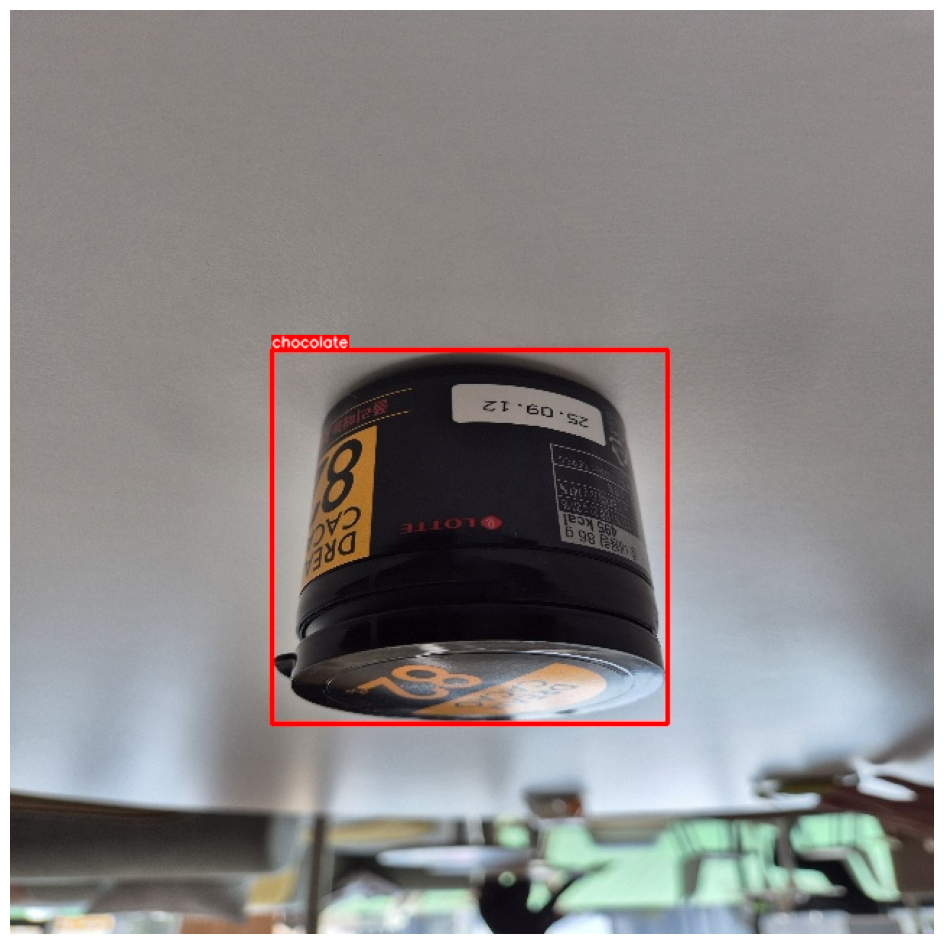

In [55]:
# 변형한 이미지 확인 5

visualize(image, bboxes, category_ids, category_id_to_name, img_shape)

In [11]:
# transform한 이미지로 yolo 모델 훈련하기

import torch
from ultralytics import YOLO

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = YOLO('yolo11n.pt')

results = model.train(data='./data_transformed.yaml', epochs=150, imgsz=640, device=device, batch=8)

Ultralytics 8.3.9  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=./data_transformed.yaml, epochs=150, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

train: Scanning C:\Users\YJKIM_PC\yolo11\yolo custom dataset\train_transformed\labels... 132 images, 0 backgrounds, 0 corrupt: 100%|██████████| 132/132 [00:00<00:00, 2030.82it/s]

train: New cache created: C:\Users\YJKIM_PC\yolo11\yolo custom dataset\train_transformed\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\YJKIM_PC\yolo11\yolo custom dataset\valid\labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train15
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150       1.3G     0.5259       3.33     0.9078         11        640: 100%|██████████| 17/17 [00:14<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]


                   all         28         36    0.00402      0.951      0.317      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.29G     0.4975       2.64     0.8674          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         28         36    0.00379      0.896      0.615      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.28G     0.5281      1.974     0.9118          5        640: 100%|██████████| 17/17 [00:01<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]

                   all         28         36    0.00323      0.743      0.297      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.29G      0.552       1.68      0.923          9        640: 100%|██████████| 17/17 [00:01<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]

                   all         28         36          1     0.0604      0.271      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      1.28G     0.5009      1.574     0.8758          8        640: 100%|██████████| 17/17 [00:01<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all         28         36      0.732       0.25      0.315      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.29G     0.4798      1.521     0.8733          9        640: 100%|██████████| 17/17 [00:01<00:00, 10.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all         28         36      0.534       0.39      0.413      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      1.29G     0.4977      1.366     0.8809         10        640: 100%|██████████| 17/17 [00:01<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]

                   all         28         36      0.532      0.661      0.573       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      1.29G     0.4458      1.407     0.8647          7        640: 100%|██████████| 17/17 [00:01<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         36      0.695      0.736      0.658      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      1.29G     0.4488       1.24     0.8674          6        640: 100%|██████████| 17/17 [00:01<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         28         36      0.715      0.722      0.728      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      1.29G     0.4496      1.298     0.8462         11        640: 100%|██████████| 17/17 [00:01<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         36      0.606      0.522       0.55      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      1.29G     0.4433      1.236     0.8582         10        640: 100%|██████████| 17/17 [00:01<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.87it/s]

                   all         28         36      0.781      0.638      0.806      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      1.28G     0.4059      1.161      0.854          9        640: 100%|██████████| 17/17 [00:01<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.10it/s]

                   all         28         36      0.667      0.428      0.555      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      1.29G     0.4043      1.133     0.8548          6        640: 100%|██████████| 17/17 [00:01<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]


                   all         28         36      0.624      0.587      0.588      0.477

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      1.29G     0.3695      1.018     0.8422         10        640: 100%|██████████| 17/17 [00:01<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.66it/s]

                   all         28         36       0.85      0.554      0.609      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      1.29G      0.407      1.114     0.8721         11        640: 100%|██████████| 17/17 [00:01<00:00,  9.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         28         36      0.796      0.568      0.658      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      1.29G     0.4003      1.091      0.852          7        640: 100%|██████████| 17/17 [00:01<00:00,  9.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]

                   all         28         36        0.8       0.68      0.796      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      1.29G     0.3792      1.056     0.8598         10        640: 100%|██████████| 17/17 [00:01<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.17it/s]

                   all         28         36      0.872      0.799      0.844      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      1.29G     0.3677     0.9638     0.8378          7        640: 100%|██████████| 17/17 [00:01<00:00,  9.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all         28         36      0.928      0.808      0.808      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      1.29G     0.3636     0.9311     0.8335         11        640: 100%|██████████| 17/17 [00:01<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all         28         36      0.767      0.665      0.704      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      1.28G     0.3422     0.9988     0.8492          8        640: 100%|██████████| 17/17 [00:01<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]

                   all         28         36      0.769      0.636      0.704      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      1.29G     0.3458     0.9336     0.8284          9        640: 100%|██████████| 17/17 [00:01<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]


                   all         28         36      0.685      0.653      0.661      0.537

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      1.29G     0.3648      0.936     0.8434          8        640: 100%|██████████| 17/17 [00:01<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.64it/s]

                   all         28         36      0.689      0.609      0.675      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      1.29G     0.3763      0.892     0.8645         11        640: 100%|██████████| 17/17 [00:01<00:00,  9.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]


                   all         28         36      0.725      0.687      0.726      0.547

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      1.29G     0.3419      0.885     0.8259          4        640: 100%|██████████| 17/17 [00:01<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         28         36      0.689      0.611      0.649      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      1.29G     0.3946     0.8671     0.8486          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         28         36      0.886      0.802      0.828      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      1.29G     0.3334      0.809     0.8432         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         36      0.932      0.805      0.907      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      1.29G     0.3496     0.8002      0.838          7        640: 100%|██████████| 17/17 [00:02<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.11it/s]

                   all         28         36      0.875      0.689      0.819      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      1.28G     0.3284     0.7981      0.835          9        640: 100%|██████████| 17/17 [00:02<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]

                   all         28         36      0.779      0.802      0.864      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      1.29G     0.3121      0.712     0.8404          6        640: 100%|██████████| 17/17 [00:02<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         28         36      0.859      0.752       0.79      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      1.29G     0.3334     0.8001     0.8335         14        640: 100%|██████████| 17/17 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         28         36      0.694      0.648      0.663      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      1.29G     0.3221     0.7271     0.8507          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all         28         36      0.796      0.495      0.562      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      1.29G     0.3154     0.7441     0.8464          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all         28         36      0.792      0.638      0.685      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      1.29G     0.3161     0.8068      0.834         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]

                   all         28         36       0.84      0.589      0.705      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      1.29G     0.3199     0.7328     0.8208          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all         28         36       0.94      0.747      0.846      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      1.29G     0.3092     0.6538     0.8268         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]

                   all         28         36      0.853       0.92      0.943      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      1.28G     0.2994     0.6773     0.8124          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         28         36      0.894      0.972      0.973      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      1.29G     0.3239     0.6758     0.8329          7        640: 100%|██████████| 17/17 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         28         36        0.9      0.972      0.975      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      1.29G     0.3103     0.6927     0.8231          6        640: 100%|██████████| 17/17 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all         28         36      0.889      0.861      0.926      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      1.29G     0.2827     0.6084     0.8174         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all         28         36      0.894       0.81      0.861      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.29G     0.2825     0.6632      0.824          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         28         36      0.917      0.759      0.795      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.29G     0.2676     0.6308     0.8302          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.77it/s]

                   all         28         36       0.74      0.749      0.806      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.29G     0.2749     0.6687     0.8131          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]

                   all         28         36      0.797       0.49      0.638      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.29G     0.2703     0.6238     0.8296          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all         28         36      0.816      0.799      0.833      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.28G     0.2793     0.6303     0.8316         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.02it/s]

                   all         28         36      0.769      0.763      0.783      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      1.29G     0.2545     0.5424     0.8224         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.13it/s]

                   all         28         36      0.752      0.583      0.694      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      1.29G     0.2588     0.5594     0.8192          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]

                   all         28         36      0.743      0.628      0.679       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      1.29G     0.2586     0.5602     0.8072         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         28         36      0.721      0.606      0.706      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      1.29G     0.2604     0.6271     0.8278          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]

                   all         28         36      0.735      0.709      0.744      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      1.29G     0.2533     0.5698     0.8285          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all         28         36       0.88      0.778      0.795      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      1.29G     0.2572     0.5904      0.811          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         28         36      0.839      0.759      0.784      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      1.29G     0.2566     0.6134     0.8193          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all         28         36      0.876      0.757      0.791      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      1.28G     0.2656     0.5732     0.8111          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         28         36      0.795      0.792      0.859      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      1.29G       0.27     0.5502     0.8208         12        640: 100%|██████████| 17/17 [00:01<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         28         36      0.904      0.889      0.937      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      1.29G     0.2593     0.5005     0.8333          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         36      0.942      0.896      0.928       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      1.29G      0.259     0.5615     0.8276          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         36       0.84      0.857      0.904      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      1.29G     0.2528     0.5482     0.8112          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         28         36      0.886      0.809      0.864      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      1.29G     0.2426     0.5938     0.8058          4        640: 100%|██████████| 17/17 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         28         36      0.871      0.691      0.859       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      1.29G     0.2443     0.5169     0.8051          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.33it/s]

                   all         28         36      0.884      0.745      0.831      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      1.29G     0.2657     0.4784     0.8147          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         28         36      0.898      0.779      0.838       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      1.28G     0.2442     0.4724     0.8135          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.66it/s]

                   all         28         36        0.9      0.773      0.819      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      1.29G     0.2325     0.5025      0.821         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.34it/s]

                   all         28         36      0.863      0.637      0.778      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      1.29G     0.2467     0.4604     0.8072          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all         28         36      0.844      0.654      0.769      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      1.29G     0.2318      0.461     0.8154         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all         28         36      0.841      0.686      0.769      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      1.29G     0.2352     0.5078     0.8223         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         28         36      0.925      0.708      0.783      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      1.29G     0.2272     0.4826     0.8241          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         28         36      0.893      0.788      0.816      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      1.29G     0.2405     0.4672     0.8238          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.68it/s]

                   all         28         36      0.841      0.785      0.843      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      1.29G     0.2517     0.4458     0.8184         10        640: 100%|██████████| 17/17 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         28         36      0.899      0.749      0.823      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      1.28G     0.2256     0.4529     0.8198          6        640: 100%|██████████| 17/17 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all         28         36      0.941      0.719       0.81      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      1.29G     0.2342     0.4508     0.8236          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]

                   all         28         36      0.942      0.704      0.818      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      1.29G     0.2378     0.4887     0.8334          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         28         36      0.905      0.684      0.819      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      1.29G     0.2199     0.4691     0.8058          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]

                   all         28         36      0.913      0.736      0.843      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      1.29G     0.2406     0.4641     0.8162          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         28         36      0.914      0.736      0.826      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      1.29G     0.2212     0.4573     0.8195          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         28         36      0.858      0.722      0.834      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      1.29G      0.207     0.4169     0.8034          5        640: 100%|██████████| 17/17 [00:02<00:00,  7.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]

                   all         28         36      0.861       0.77      0.833      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      1.29G     0.2331     0.4442     0.8105          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]

                   all         28         36      0.891      0.758      0.857      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      1.28G     0.2331     0.4472      0.806         12        640: 100%|██████████| 17/17 [00:01<00:00,  8.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]

                   all         28         36      0.815      0.787       0.83      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      1.29G     0.2157     0.4021     0.8085         11        640: 100%|██████████| 17/17 [00:01<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

                   all         28         36       0.77       0.84       0.84       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      1.29G     0.2139     0.4033     0.8052         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.66it/s]

                   all         28         36      0.846      0.784      0.883      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      1.29G      0.212     0.3907     0.8094          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all         28         36      0.851      0.831      0.876       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      1.29G     0.2062     0.4104     0.8128          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all         28         36      0.916      0.805      0.887      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      1.29G     0.2043     0.3908     0.8096          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         28         36      0.871       0.76      0.838      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      1.29G     0.2124     0.3827     0.8174         13        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.51it/s]

                   all         28         36      0.846      0.701      0.761      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      1.29G     0.2185      0.376     0.8037          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]

                   all         28         36      0.853      0.677      0.763      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      1.28G     0.2238     0.3754     0.8149          4        640: 100%|██████████| 17/17 [00:01<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all         28         36      0.877      0.693      0.768      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      1.29G     0.1997     0.3744     0.8142         13        640: 100%|██████████| 17/17 [00:01<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         28         36      0.874      0.714      0.805      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      1.29G     0.2122      0.382     0.8157          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all         28         36      0.896      0.773       0.86      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      1.29G     0.1994     0.3398      0.807         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         36      0.883      0.751      0.814      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      1.29G     0.2049     0.3772      0.803          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]

                   all         28         36      0.949       0.79      0.872      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      1.29G     0.2127      0.366     0.8032          4        640: 100%|██████████| 17/17 [00:01<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         28         36      0.931      0.793      0.873      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      1.29G     0.2017     0.3496     0.8182          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all         28         36      0.898      0.826        0.9      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      1.29G     0.1924     0.3382     0.8114         12        640: 100%|██████████| 17/17 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.07it/s]

                   all         28         36      0.903      0.832      0.919      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      1.28G      0.204     0.3597     0.8046          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]


                   all         28         36      0.903       0.83      0.917      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      1.29G     0.1971     0.3606     0.8078         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]

                   all         28         36      0.921      0.822      0.894      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      1.29G     0.2051     0.3639      0.803          6        640: 100%|██████████| 17/17 [00:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]

                   all         28         36      0.929      0.807      0.875      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      1.29G     0.1912     0.3477     0.8024          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]

                   all         28         36      0.902      0.821      0.867      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      1.29G     0.2107     0.3646     0.8014         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.33it/s]

                   all         28         36      0.979       0.77      0.885      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      1.29G     0.2131     0.3488      0.814          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all         28         36      0.841      0.703      0.792      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      1.29G     0.1862     0.3569     0.8069          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         36       0.81      0.695      0.749      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      1.29G     0.1904     0.3563     0.8175         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all         28         36      0.769      0.648      0.729      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      1.28G      0.182     0.3521     0.7998          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all         28         36      0.731      0.633      0.686      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      1.29G     0.1756     0.3346      0.785          2        640: 100%|██████████| 17/17 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]

                   all         28         36      0.734      0.595      0.697      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      1.29G      0.175     0.3341     0.8147          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         28         36      0.796      0.661      0.722      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      1.29G      0.206     0.3555     0.8089         11        640: 100%|██████████| 17/17 [00:01<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all         28         36      0.807      0.712      0.784      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      1.29G     0.1853     0.3276     0.7993          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]

                   all         28         36      0.839      0.729      0.844      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      1.29G      0.173      0.323     0.8105         10        640: 100%|██████████| 17/17 [00:01<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]

                   all         28         36        0.9      0.816      0.875      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      1.29G     0.1887     0.3106     0.8073          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.25it/s]


                   all         28         36      0.918      0.803      0.889      0.692

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      1.29G     0.1811     0.3311     0.8165          9        640: 100%|██████████| 17/17 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.89it/s]

                   all         28         36      0.942      0.804      0.917      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      1.28G     0.1822     0.3347     0.8138          5        640: 100%|██████████| 17/17 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all         28         36      0.952      0.803      0.923      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      1.29G     0.1658     0.3075     0.7938          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]


                   all         28         36      0.955      0.803      0.913      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      1.29G     0.1799     0.2981     0.8051          6        640: 100%|██████████| 17/17 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]

                   all         28         36      0.954        0.8      0.877      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      1.29G     0.1701     0.3105     0.8168         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.90it/s]

                   all         28         36       0.96      0.792       0.87      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      1.29G     0.1706        0.3     0.7997          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

                   all         28         36       0.94      0.788      0.845      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      1.29G     0.1823      0.295     0.8068         12        640: 100%|██████████| 17/17 [00:01<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]

                   all         28         36      0.874      0.802      0.833      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      1.29G     0.1755     0.3137     0.7948         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]

                   all         28         36      0.854      0.785      0.822      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      1.29G     0.2058     0.3069     0.8171         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]

                   all         28         36      0.936      0.775      0.816      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      1.28G     0.1834     0.2918     0.7969          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all         28         36       0.95      0.778      0.805      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      1.29G     0.1637     0.3136     0.8046          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         28         36      0.969      0.779      0.799      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      1.29G     0.1785     0.3458     0.8204         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.12it/s]

                   all         28         36      0.977      0.781      0.846      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      1.29G     0.1695     0.3059     0.8011         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all         28         36      0.967      0.774      0.864      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      1.29G     0.1534     0.3153     0.8067         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]

                   all         28         36      0.943      0.765      0.862      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      1.29G      0.165     0.3009     0.7917         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.91it/s]

                   all         28         36      0.968      0.751      0.871      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      1.29G     0.1627     0.2825     0.8193          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.99it/s]

                   all         28         36      0.959       0.75      0.872      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      1.29G     0.1646     0.3049     0.8044          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]

                   all         28         36       0.91      0.797      0.853      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      1.28G     0.1633     0.2725        0.8         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.74it/s]


                   all         28         36      0.895        0.8      0.841      0.706

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      1.29G     0.1642     0.2918     0.7913          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]

                   all         28         36      0.854      0.805      0.828      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      1.29G     0.1623     0.2678     0.8122          3        640: 100%|██████████| 17/17 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.90it/s]

                   all         28         36      0.905      0.798      0.837      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      1.29G     0.1481     0.2729     0.7868          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]

                   all         28         36      0.853       0.82      0.851      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      1.29G     0.1599     0.3025     0.8113          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]

                   all         28         36      0.843       0.83      0.889      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      1.29G     0.1665     0.2914     0.8064         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.27it/s]

                   all         28         36      0.882      0.833      0.911      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      1.29G     0.1504     0.2761     0.7963          7        640: 100%|██████████| 17/17 [00:02<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all         28         36      0.847      0.861      0.919      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      1.29G       0.15     0.2648     0.7982          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]

                   all         28         36      0.928       0.81      0.912       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      1.28G     0.1528     0.2667     0.8002          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]

                   all         28         36      0.933      0.822      0.904      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      1.29G     0.1619     0.2772     0.7991         11        640: 100%|██████████| 17/17 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]

                   all         28         36      0.956      0.799      0.885      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      1.29G     0.1563     0.2873     0.7944          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.99it/s]

                   all         28         36      0.946      0.766      0.871        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      1.29G     0.1525     0.2619     0.8071          9        640: 100%|██████████| 17/17 [00:01<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         36      0.905      0.743      0.837      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      1.29G     0.1531     0.2603     0.7802         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         28         36      0.873      0.752      0.832      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      1.29G     0.1383     0.2746     0.8006         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all         28         36      0.869      0.754      0.828      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      1.29G      0.124     0.2422     0.7921          6        640: 100%|██████████| 17/17 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         28         36      0.876      0.764      0.819      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      1.29G     0.1532     0.2602     0.8065          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.57it/s]

                   all         28         36      0.961      0.732      0.813      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      1.28G     0.1395      0.246     0.8051         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         28         36      0.869      0.795      0.814      0.695


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      1.34G     0.1221     0.2431     0.7469          4        640: 100%|██████████| 17/17 [00:09<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         36       0.89      0.796      0.806      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      1.29G     0.1239     0.2275      0.772          4        640: 100%|██████████| 17/17 [00:02<00:00,  7.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all         28         36      0.899       0.79      0.809      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      1.29G     0.1282      0.236     0.7758          4        640: 100%|██████████| 17/17 [00:02<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         28         36      0.863      0.798      0.809      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      1.29G     0.1231     0.2311     0.7724          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         28         36      0.883      0.789      0.813       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      1.29G     0.1218     0.2184     0.7381          4        640: 100%|██████████| 17/17 [00:01<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]

                   all         28         36      0.911      0.785      0.816      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      1.29G     0.1239     0.2414      0.763          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         28         36      0.898      0.791      0.819      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      1.29G     0.1119     0.2281     0.7762          4        640: 100%|██████████| 17/17 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]

                   all         28         36      0.911      0.763      0.809      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      1.28G     0.1145     0.2244     0.7609          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all         28         36      0.913      0.763      0.808      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      1.29G     0.1138     0.2335     0.7433          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all         28         36      0.916      0.764      0.804       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      1.29G     0.1171     0.2288     0.7647          5        640: 100%|██████████| 17/17 [00:01<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]

                   all         28         36      0.921       0.77      0.804      0.672



150 epochs completed in 0.117 hours.
Optimizer stripped from runs\detect\train15\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train15\weights\best.pt, 5.5MB

Validating runs\detect\train15\weights\best.pt...
Ultralytics 8.3.9  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.69it/s]


                   all         28         36      0.952      0.804      0.925      0.778
             chocolate          8          8      0.923          1      0.995      0.921
                 timer         16         16      0.932      0.938      0.881      0.772
                 candy         12         12          1      0.474      0.898       0.64
Speed: 0.2ms preprocess, 1.6ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train15


In [18]:
# trasnform한 이미지를 사용해 웹캠으로 테스트

import cv2
from ultralytics import YOLO

model = YOLO('C:/Users/YJKIM_PC/yolo11/runs/detect/train15/weights/best.pt')

cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    for result in results[0].boxes:
        box = result.xyxy[0].cpu().numpy()
        conf = result.conf[0]
        label = result.cls[0].item()

        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

        cv2.putText(frame, f'ID: {label}, Conf: {conf:.2f}', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    cv2.imshow('YOLO11n webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 1 timer, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 9.0ms
Speed: 1.0ms preprocess, 9.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms post

In [12]:
#  transform한 이미지를 사용하되 나노 모델이 아닌 스몰 모델을 사용해서 훈련함

import torch
from ultralytics import YOLO

device = 'cuda' if torch.cuda.is_available() else 'cpu'

model2 = YOLO('yolo11s.pt')

results = model.train(data='./data_transformed.yaml', epochs=150, imgsz=640, device=device, batch=8)

Ultralytics 8.3.9  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=./data_transformed.yaml, epochs=150, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train152, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning C:\Users\YJKIM_PC\yolo11\yolo custom dataset\train_transformed\labels.cache... 132 images, 0 backgrounds, 0 corrupt: 100%|██████████| 132/132 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning C:\Users\YJKIM_PC\yolo11\yolo custom dataset\valid\labels.cache... 28 images, 0 backgrounds, 0 corrupt: 100%|██████████| 28/28 [00:00<?, ?it/s]


Plotting labels to runs\detect\train152\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train152
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      1.33G     0.1761      0.345     0.8098         11        640: 100%|██████████| 17/17 [00:17<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all         28         36      0.972      0.789      0.901      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      1.29G     0.1965     0.3512     0.7979          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]

                   all         28         36      0.872      0.722      0.749      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      1.28G     0.2159     0.3498     0.8125          5        640: 100%|██████████| 17/17 [00:01<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all         28         36       0.92      0.703      0.767       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      1.29G     0.2564     0.3924     0.8406          9        640: 100%|██████████| 17/17 [00:01<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]

                   all         28         36      0.931      0.609      0.705      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      1.29G     0.2513     0.3854     0.8014          8        640: 100%|██████████| 17/17 [00:01<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]

                   all         28         36      0.951      0.629      0.644      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      1.29G      0.245     0.3955      0.803          9        640: 100%|██████████| 17/17 [00:01<00:00,  9.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.42it/s]

                   all         28         36      0.924      0.652      0.664      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      1.29G      0.263     0.4123     0.8255         10        640: 100%|██████████| 17/17 [00:01<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]

                   all         28         36      0.825      0.668      0.688      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      1.29G     0.2593     0.4268     0.8168          7        640: 100%|██████████| 17/17 [00:01<00:00,  9.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.18it/s]

                   all         28         36      0.801      0.615      0.628      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      1.29G     0.2634     0.4175     0.8303          6        640: 100%|██████████| 17/17 [00:01<00:00,  9.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all         28         36      0.891      0.629       0.64       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      1.29G     0.2708     0.4134     0.8094         11        640: 100%|██████████| 17/17 [00:01<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.79it/s]

                   all         28         36      0.836      0.547      0.611      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      1.29G     0.2817     0.4028       0.83         10        640: 100%|██████████| 17/17 [00:01<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]

                   all         28         36      0.749      0.652      0.758       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      1.28G     0.2643     0.4018     0.8347          9        640: 100%|██████████| 17/17 [00:01<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.27it/s]

                   all         28         36      0.737      0.684      0.706      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      1.29G     0.2543      0.405     0.8279          6        640: 100%|██████████| 17/17 [00:01<00:00,  9.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

                   all         28         36      0.751      0.638      0.713      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      1.29G      0.247       0.38     0.8136         10        640: 100%|██████████| 17/17 [00:01<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.99it/s]

                   all         28         36      0.787      0.772      0.825      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      1.29G      0.266     0.4555     0.8225         11        640: 100%|██████████| 17/17 [00:01<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.98it/s]

                   all         28         36      0.802      0.727      0.752      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      1.29G     0.2555     0.4222     0.8155          7        640: 100%|██████████| 17/17 [00:01<00:00,  9.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all         28         36      0.633       0.57      0.563      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      1.29G      0.242     0.3959     0.8258         10        640: 100%|██████████| 17/17 [00:01<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]

                   all         28         36      0.813       0.55      0.607      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      1.29G     0.2495     0.3964      0.809          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         28         36      0.936      0.598      0.692      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      1.29G     0.2331      0.348      0.807         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]

                   all         28         36      0.865      0.653      0.766      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      1.28G     0.2344     0.4293      0.822          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all         28         36       0.86      0.728      0.803      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      1.29G     0.2259     0.3861     0.8092          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]

                   all         28         36      0.858      0.756      0.782       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      1.29G     0.2428     0.4446      0.816          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.76it/s]

                   all         28         36       0.91      0.742      0.792      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      1.29G     0.2585     0.4083     0.8355         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all         28         36      0.879      0.624      0.782      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      1.29G     0.2305     0.3735     0.8001          4        640: 100%|██████████| 17/17 [00:02<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]

                   all         28         36       0.81       0.61      0.816      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      1.29G     0.2549     0.3849     0.8185          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all         28         36      0.781       0.71       0.81      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      1.29G      0.244     0.3837     0.8296         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]

                   all         28         36      0.901      0.643      0.817      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      1.29G     0.2315     0.3867     0.8134          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all         28         36      0.952      0.589       0.74      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      1.28G     0.2262     0.3802     0.8188          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         28         36      0.956      0.462      0.566      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      1.29G     0.2168     0.3551     0.8248          6        640: 100%|██████████| 17/17 [00:01<00:00,  8.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all         28         36      0.801       0.41      0.505      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      1.29G      0.238     0.3621     0.8221         14        640: 100%|██████████| 17/17 [00:02<00:00,  7.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all         28         36      0.523      0.289      0.407      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      1.29G     0.2397     0.3629     0.8404          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]


                   all         28         36      0.537      0.232      0.327      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      1.29G     0.2394      0.353     0.8241          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all         28         36      0.599      0.367      0.477      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      1.29G     0.2493     0.3887      0.825         11        640: 100%|██████████| 17/17 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

                   all         28         36      0.867      0.456      0.624      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      1.29G     0.2364     0.3463     0.8087          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all         28         36      0.815      0.472      0.678      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      1.29G     0.2375     0.3394     0.8148         10        640: 100%|██████████| 17/17 [00:02<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

                   all         28         36      0.776      0.583      0.648      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      1.28G     0.2429     0.3557     0.7984          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]

                   all         28         36      0.853      0.705      0.759      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      1.29G     0.2511     0.3492      0.822          7        640: 100%|██████████| 17/17 [00:02<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         28         36      0.838      0.806      0.813      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      1.29G     0.2317     0.3708     0.7998          6        640: 100%|██████████| 17/17 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         28         36      0.935      0.808      0.847      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      1.29G     0.2303     0.3322     0.8092         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         28         36      0.851      0.826      0.887      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      1.29G     0.2302     0.3956     0.8154          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]

                   all         28         36      0.938      0.729      0.863      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      1.29G     0.2275     0.3321     0.8292          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all         28         36      0.933      0.729      0.885      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      1.29G     0.2175     0.3499     0.8024          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.16it/s]

                   all         28         36      0.888      0.739      0.811       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      1.29G     0.2273     0.3339     0.8216          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         28         36      0.854      0.652      0.721      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      1.28G     0.2272       0.36     0.8196         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all         28         36      0.866      0.628      0.725      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      1.29G      0.218     0.3266     0.8183         12        640: 100%|██████████| 17/17 [00:02<00:00,  7.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.08it/s]

                   all         28         36      0.957      0.552      0.748      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      1.29G     0.2193     0.3234     0.8148          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]

                   all         28         36      0.877      0.798      0.845      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      1.29G     0.2237     0.3151      0.797         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.17it/s]

                   all         28         36      0.894      0.826      0.883       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      1.29G     0.2227     0.3597      0.818          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         28         36      0.824      0.752      0.811      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      1.29G     0.2129     0.3503      0.822          9        640: 100%|██████████| 17/17 [00:02<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all         28         36       0.87      0.676      0.772      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      1.29G      0.207     0.3403     0.8145          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         28         36      0.755      0.595      0.692      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      1.29G     0.2086       0.33     0.8082          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         28         36      0.728       0.53      0.631      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      1.28G     0.2121     0.3326     0.8054          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.50it/s]

                   all         28         36      0.978      0.587      0.733      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      1.29G     0.2195     0.3341     0.8116         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         28         36      0.827      0.618      0.726       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      1.29G     0.2084     0.3009     0.8231          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]

                   all         28         36      0.875      0.667      0.718      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      1.29G     0.2061     0.3146     0.8173          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all         28         36      0.876      0.662      0.699      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      1.29G     0.2114     0.3487     0.8096          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.90it/s]

                   all         28         36      0.895      0.694      0.732      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      1.29G     0.1975     0.3346     0.8003          4        640: 100%|██████████| 17/17 [00:01<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.42it/s]

                   all         28         36      0.813      0.608      0.743       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      1.29G     0.2089     0.3347     0.8051          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]

                   all         28         36      0.867      0.633      0.746      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      1.29G     0.2099     0.2906     0.8108          9        640: 100%|██████████| 17/17 [00:02<00:00,  7.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all         28         36      0.748       0.75      0.819      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      1.28G     0.2021     0.2927     0.8066          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         28         36      0.707      0.658      0.706      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      1.29G     0.1904     0.3277     0.8143         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all         28         36      0.739      0.599      0.625      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      1.29G     0.2043     0.3013     0.7989          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         28         36      0.626      0.535      0.602      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      1.29G     0.1996     0.3003     0.8066         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]

                   all         28         36      0.664      0.541      0.601      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      1.29G     0.2058     0.3328     0.8163         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all         28         36      0.737       0.55       0.64      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      1.29G     0.1921     0.2959     0.8061          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]

                   all         28         36       0.82      0.635      0.703      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      1.29G     0.1922     0.2889     0.8153          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.39it/s]

                   all         28         36      0.773      0.665      0.753      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      1.29G     0.2103     0.2801     0.8128         10        640: 100%|██████████| 17/17 [00:02<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.44it/s]

                   all         28         36      0.952      0.788      0.874      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      1.28G     0.1906     0.2754     0.8116          6        640: 100%|██████████| 17/17 [00:01<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]

                   all         28         36      0.948      0.822      0.905      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      1.29G     0.1963     0.2804      0.818          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]

                   all         28         36      0.932      0.608      0.747       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      1.29G     0.2042     0.3018     0.8254          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]

                   all         28         36      0.929      0.644      0.725      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      1.29G     0.1855     0.2964     0.7999          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]

                   all         28         36      0.869      0.632      0.757       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      1.29G     0.2117     0.2973     0.8102          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         28         36      0.838       0.73      0.802      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      1.29G      0.179     0.2774     0.8108          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all         28         36      0.827      0.505       0.63      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      1.29G     0.1724     0.2613     0.7942          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         28         36      0.761      0.444      0.536      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      1.29G     0.1933     0.2796     0.8064          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.98it/s]

                   all         28         36      0.813       0.59      0.701      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      1.28G     0.1902     0.2806     0.8017         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.90it/s]

                   all         28         36      0.869      0.735      0.794      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      1.29G     0.1813     0.2833     0.8029         11        640: 100%|██████████| 17/17 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         28         36      0.856      0.767      0.793      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      1.29G     0.1775      0.263     0.7979         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]

                   all         28         36      0.891      0.767      0.817      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      1.29G      0.183     0.2528     0.8017          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.53it/s]

                   all         28         36      0.923      0.798      0.826      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      1.29G     0.1802     0.2669     0.8106          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         28         36      0.958      0.744      0.837      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      1.29G     0.1787     0.2663     0.8054          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]

                   all         28         36      0.904      0.717      0.761      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      1.29G     0.1874     0.2826     0.8143         13        640: 100%|██████████| 17/17 [00:01<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

                   all         28         36      0.929      0.687      0.771      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      1.29G     0.1834      0.254     0.8015          8        640: 100%|██████████| 17/17 [00:01<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.25it/s]

                   all         28         36      0.847      0.701      0.763      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      1.28G     0.1849     0.2581      0.809          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all         28         36      0.875       0.69      0.747      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      1.29G     0.1726     0.2328      0.811         13        640: 100%|██████████| 17/17 [00:01<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         28         36      0.851      0.693      0.748      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      1.29G     0.1829     0.2495     0.8136          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all         28         36      0.927      0.772       0.82      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      1.29G      0.185     0.2379      0.804         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.71it/s]

                   all         28         36       0.97      0.728      0.812      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      1.29G     0.1689     0.2611        0.8          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]

                   all         28         36      0.953      0.761      0.821       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      1.29G     0.1829     0.2578     0.7978          4        640: 100%|██████████| 17/17 [00:01<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all         28         36      0.961      0.751      0.839      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150      1.29G     0.1779     0.2406     0.8134          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.83it/s]

                   all         28         36      0.905      0.752      0.847      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      1.29G     0.1694     0.2367     0.8058         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all         28         36      0.915      0.751      0.818      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      1.28G     0.1792     0.2409     0.7996          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         28         36      0.878      0.737      0.823      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      1.29G     0.1752     0.2429     0.8053         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         28         36      0.855      0.755      0.886      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150      1.29G     0.1854     0.2838     0.8041          6        640: 100%|██████████| 17/17 [00:02<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]

                   all         28         36      0.867      0.804      0.893      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      1.29G     0.1702     0.2467     0.7999          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]

                   all         28         36      0.872      0.851      0.898      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      1.29G     0.1723     0.2487     0.7972         10        640: 100%|██████████| 17/17 [00:01<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all         28         36      0.912      0.817      0.915      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      1.29G     0.1788      0.254     0.8059          7        640: 100%|██████████| 17/17 [00:02<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all         28         36      0.931      0.845      0.891      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      1.29G     0.1631     0.2416     0.8006          9        640: 100%|██████████| 17/17 [00:01<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all         28         36      0.872      0.837      0.857      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      1.29G     0.1642     0.2532     0.8114         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all         28         36      0.907      0.698       0.79      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      1.28G     0.1541     0.2502     0.7929          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all         28         36      0.883       0.65      0.755      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      1.29G      0.153     0.2156     0.7835          2        640: 100%|██████████| 17/17 [00:02<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all         28         36      0.888      0.603       0.72      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      1.29G     0.1495     0.2116     0.8104          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all         28         36      0.885      0.604      0.721      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      1.29G     0.1773     0.2354     0.8066         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]

                   all         28         36      0.792      0.583      0.718      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      1.29G     0.1603     0.2322     0.7918          8        640: 100%|██████████| 17/17 [00:02<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]

                   all         28         36      0.868      0.657      0.775      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      1.29G     0.1563     0.2432     0.8106         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.17it/s]

                   all         28         36      0.829      0.682      0.784      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      1.29G     0.1659     0.2283      0.804          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         28         36       0.82      0.715      0.771       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      1.29G     0.1591     0.2317     0.8159          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all         28         36      0.847      0.739      0.791      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      1.28G      0.159     0.2258      0.809          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all         28         36      0.864       0.78      0.816      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      1.29G     0.1484     0.2136     0.7905          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all         28         36      0.911       0.78      0.848       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      1.29G     0.1528     0.2073      0.804          6        640: 100%|██████████| 17/17 [00:01<00:00,  8.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]

                   all         28         36      0.919       0.78      0.859      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      1.29G     0.1513     0.2178     0.8128         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]

                   all         28         36      0.922      0.791      0.851       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      1.29G     0.1481      0.217     0.7948          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.70it/s]

                   all         28         36      0.894       0.75      0.839      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      1.29G      0.161     0.2234     0.8014         12        640: 100%|██████████| 17/17 [00:02<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all         28         36      0.966      0.716      0.845      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150      1.29G     0.1539     0.2312     0.7912         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]

                   all         28         36      0.883      0.735      0.817      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      1.29G      0.171     0.2368     0.7978         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all         28         36       0.88      0.758      0.824      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      1.28G     0.1528     0.2102     0.7943          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all         28         36      0.923      0.735      0.829      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      1.29G     0.1448       0.22     0.8034          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         28         36      0.924      0.699      0.825      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      1.29G      0.151     0.2611      0.818         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]

                   all         28         36      0.936      0.653      0.815      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      1.29G     0.1483     0.2212     0.7998         11        640: 100%|██████████| 17/17 [00:02<00:00,  8.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]

                   all         28         36      0.941      0.673      0.828      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      1.29G     0.1379     0.2296     0.8065         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]

                   all         28         36      0.941      0.675      0.824      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      1.29G     0.1443     0.2142     0.7905         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]


                   all         28         36      0.938       0.71      0.806      0.686

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      1.29G     0.1407     0.1991     0.8194          7        640: 100%|██████████| 17/17 [00:01<00:00,  8.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all         28         36      0.926      0.742      0.827      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      1.29G      0.141     0.2145     0.8021          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         28         36      0.905      0.723      0.821      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      1.28G     0.1463     0.1994     0.8014         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all         28         36      0.906      0.743      0.806      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      1.29G     0.1453     0.2171     0.7875          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]

                   all         28         36       0.92       0.74      0.808      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      1.29G     0.1468     0.1949     0.8104          3        640: 100%|██████████| 17/17 [00:02<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]

                   all         28         36      0.892      0.734       0.82      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      1.29G     0.1319     0.2078     0.7884          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]

                   all         28         36      0.894      0.722      0.825      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      1.29G     0.1453     0.2183     0.8095          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.95it/s]


                   all         28         36      0.894      0.731       0.82        0.7

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      1.29G     0.1472     0.1999     0.8009         10        640: 100%|██████████| 17/17 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]

                   all         28         36      0.909       0.76       0.81      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      1.29G     0.1329     0.2055     0.7945          7        640: 100%|██████████| 17/17 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]

                   all         28         36       0.93      0.774        0.8      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      1.29G     0.1359     0.1885      0.795          8        640: 100%|██████████| 17/17 [00:02<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all         28         36      0.943      0.722      0.791      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      1.28G     0.1349     0.1838     0.7963          4        640: 100%|██████████| 17/17 [00:01<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]

                   all         28         36      0.973      0.738      0.798      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      1.29G     0.1442     0.2133     0.7952         11        640: 100%|██████████| 17/17 [00:01<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         28         36      0.942      0.706      0.789      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      1.29G     0.1425     0.2019     0.7934          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all         28         36      0.943      0.721      0.791      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      1.29G     0.1388     0.1972     0.8027          9        640: 100%|██████████| 17/17 [00:02<00:00,  8.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         28         36      0.955      0.743      0.789      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      1.29G     0.1389     0.1929     0.7772         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]

                   all         28         36      0.962      0.717      0.794      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      1.29G     0.1259     0.1941     0.7961         10        640: 100%|██████████| 17/17 [00:01<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]

                   all         28         36       0.97      0.729      0.784      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      1.29G     0.1131     0.1662       0.79          6        640: 100%|██████████| 17/17 [00:02<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.54it/s]

                   all         28         36      0.961      0.738      0.792      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      1.29G     0.1357     0.1889     0.8053          7        640: 100%|██████████| 17/17 [00:02<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all         28         36      0.941      0.696      0.778      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      1.28G     0.1297     0.1858     0.8043         12        640: 100%|██████████| 17/17 [00:01<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         28         36      0.963      0.688      0.774      0.653


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      1.34G     0.1106     0.1525     0.7461          4        640: 100%|██████████| 17/17 [00:09<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all         28         36      0.949       0.69      0.771      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      1.29G     0.1099     0.1415      0.769          4        640: 100%|██████████| 17/17 [00:02<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         28         36      0.913       0.66      0.753      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      1.29G      0.113     0.1555     0.7749          4        640: 100%|██████████| 17/17 [00:02<00:00,  7.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]

                   all         28         36      0.902      0.658      0.752      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      1.29G     0.1153      0.152     0.7702          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all         28         36      0.922      0.663      0.737      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      1.29G     0.1165     0.1419     0.7379          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.07it/s]

                   all         28         36      0.951      0.666      0.715      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      1.29G     0.1115     0.1448      0.758          5        640: 100%|██████████| 17/17 [00:02<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         28         36      0.964      0.663      0.736      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      1.29G     0.1034     0.1345     0.7761          4        640: 100%|██████████| 17/17 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]

                   all         28         36      0.969      0.663      0.717      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      1.28G     0.1057     0.1427     0.7584          4        640: 100%|██████████| 17/17 [00:01<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all         28         36      0.969      0.665       0.72      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      1.29G      0.104     0.1511     0.7417          4        640: 100%|██████████| 17/17 [00:02<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all         28         36      0.969      0.665      0.703      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      1.29G     0.1077     0.1365     0.7632          5        640: 100%|██████████| 17/17 [00:01<00:00,  8.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         28         36      0.967      0.664      0.712      0.623



150 epochs completed in 0.132 hours.
Optimizer stripped from runs\detect\train152\weights\last.pt, 5.5MB
Optimizer stripped from runs\detect\train152\weights\best.pt, 5.5MB

Validating runs\detect\train152\weights\best.pt...
Ultralytics 8.3.9  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.50it/s]


                   all         28         36      0.911      0.817      0.915      0.786
             chocolate          8          8      0.843          1      0.995      0.918
                 timer         16         16      0.938       0.95      0.947      0.847
                 candy         12         12      0.951        0.5      0.804      0.593
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train152


In [19]:
# 스몰 모델을 사용해서 웹캠 테스트

import cv2
from ultralytics import YOLO

model2 = YOLO('C:/Users/YJKIM_PC/yolo11/runs/detect/train152/weights/best.pt')

cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    for result in results[0].boxes:
        box = result.xyxy[0].cpu().numpy()
        conf = result.conf[0]
        label = result.cls[0].item()

        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

        cv2.putText(frame, f'ID: {label}, Conf: {conf:.2f}', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    cv2.imshow('YOLO11n webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 17.5ms
Speed: 3.0ms preprocess, 17.5ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 1.0ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 7.5ms
Speed: 1.0ms preprocess, 7.5ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 8.0ms
Speed: 0.9ms preprocess, 8.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 10.0ms
Speed: 1.0ms preprocess, 10.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 11.0ms
Speed: 1.0ms preprocess, 11.0ms inferen

In [1]:
# 여기서부터 강사님 코드 참고함

In [1]:
import os
HOME = os.path.join(os.getcwd(), 'customData')

orgDataPath = os.path.join(HOME, 'org')


In [2]:
from glob import glob

imagefiles = glob(os.path.join(orgDataPath, '*.jpg'))
labelfiles = glob(os.path.join(orgDataPath, '*.txt'))

In [3]:
print(imagefiles)
print(labelfiles)

['c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102805.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102809.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102813.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102821.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102824.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102829.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102832.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102837.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102844.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102854.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102904.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_102958.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_103001.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_103003.jpg', 'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_103014.jpg', 'c:\\User

In [4]:
correct = 0
for i in range(len(imagefiles)):
    if imagefiles[i].split('.jpg') == labelfiles[i].split('.txt'):
        correct += 1

print(f'correct: {correct}/{len(imagefiles)}')

correct: 116/116


In [5]:
import random
import cv2
import matplotlib.pyplot as plt
import albumentations as A

In [6]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, width, height, dataType='yolo', color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""

    if dataType == 'coco':
        x_min, y_min, w, h = bbox
        
        x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    elif dataType =='yolo':
        x_center, y_center, w, h = bbox
        # 정규화된 값 0~1사이의 값
        # 픽셀 좌표로 변환 이미지의 width와 height값을 곱해주면 된다.
        x_min = int((x_center - (w/2))*width)
        x_max = int((x_center + (w/2))*width)
        y_min = int((y_center - (h/2))*height)
        y_max = int((y_center + (h/2))*height)
    print(x_min, x_max, y_min,y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name, img_width, img_height):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name, img_width, img_height, 'yolo')
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(img)

In [7]:
def read_label_txt(txtFile):
    category_ids = []
    bboxes = []

    f = open(txtFile, 'r')
    # print(txtFile)
    while True:
        line = f.readline()
        if not line: break
        ids, xc, yc, w, h = line.split()
        category_ids.append(int(ids))
        bboxes.append([float(xc), float(yc), float(w), float(h)])
    f.close()
    return category_ids, bboxes

In [8]:
def write_label_txt(txtFile, category_ids, bboxes):
    f = open(txtFile, 'w')

    for i, ids in enumerate(category_ids):
        xc, yc, w, h = bboxes[i]
        f.write(f'{int(ids)} {xc} {yc} {w} {h}\n')
    f.close()

In [10]:
category_id_to_name = {0: 'chocolate', 1: 'timer', 2: 'candy'}

In [11]:
transform_resize = A.Compose(
    [A.LongestMaxSize(max_size=800, interpolation=cv2.INTER_LINEAR)],
    bbox_params = A.BboxParams(format='yolo', label_fields=['category_ids'])
)

In [12]:
transform_hflip = A.Compose(
    [A.HorizontalFlip(p=1.0)],
    bbox_params = A.BboxParams(format='yolo', label_fields=['category_ids'])
)

In [13]:
transform_hsv = A.HueSaturationValue(
    hue_shift_limit = (-5, 5),
    sat_shift_limit = (20, 20),
    val_shift_limit = (30, 30),
    p = 0.7
)

In [14]:
transform_shift = A.Compose(
    [A.ShiftScaleRotate(shift_limit=(-0.2, 0.2), scale_limit=(0, 0), rotate_limit=(0, 0), p=1.0)],
    bbox_params = A.BboxParams(format='yolo', min_area=1024, min_visibility=0.2, label_fields=['category_ids'])
)

In [15]:
transform_scale = A.Compose(
    [A.ShiftScaleRotate(shift_limit=(0, 0), scale_limit=(-0.2, 0.2), rotate_limit=(0, 0), p=1.0)],
    bbox_params = A.BboxParams(format='yolo', min_area=1024, min_visibility=0.2, label_fields=['category_ids'])
)

In [16]:
DEBUG = False

def dataAug(func, imagefiles):
    for imagefile in imagefiles:
        image = cv2.imread(imagefile)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_height, img_width = image.shape[0:2]

        baseName = imagefile.split('.')[0]
        txtFile = baseName + '.txt'
        category_ids, bboxes = read_label_txt(txtFile)

        if func == 'hflip':
            transformed = transform_hflip(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = baseName + '_hflip.jpg'
            saveLabelName = baseName + '_hflip.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'rotate':
            angle_inter = 20
            for angle in range(angle_inter, 360, angle_inter):
                transform_rotate = A.Compose(
                    [A.Rotate(limit=(angle, angle), rotate_method='ellipse', p=1.0)],
                    bbox_params=A.BboxParams(format='yolo', label_fields=['category_ids'])
                )
                transformed = transform_rotate(image=image, bboxes=bboxes, category_ids=category_ids)
                saveImageName = baseName + f'_rotate_{angle}.jpg'
                saveLabelName = baseName + f'_rotate_{angle}.txt'
                saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
                cv2.imwrite(saveImageName, saveImage)
                write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'resize':
            transformed = transform_resize(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = baseName + '.jpg'
            saveLabelName = baseName + '.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'hsv':
            transformed = transform_hsv(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = baseName + '_hsv.jpg'
            saveLabelName = baseName + '_hsv.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'shift':
            transformed = transform_hflip(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = baseName + '_shift.jpg'
            saveLabelName = baseName + '_shift.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])
        elif func == 'scale':
            transformed = transform_hflip(image=image, bboxes=bboxes, category_ids=category_ids)
            saveImageName = baseName + '_scale.jpg'
            saveLabelName = baseName + '_scale.txt'
            saveImage = cv2.cvtColor(transformed['image'], cv2.COLOR_RGB2BGR)
            cv2.imwrite(saveImageName, saveImage)
            write_label_txt(saveLabelName, transformed['category_ids'], transformed['bboxes'])

        if DEBUG == True:
            visualize(
                transformed['image'],
                transformed['bboxes'],
                transformed['category_ids'],
                category_id_to_name,
                img_width, img_height
            )
            break

In [17]:
dataAug('resize', imagefiles)

In [18]:
dataAug('hflip', imagefiles)

In [19]:
dataAug('rotate', imagefiles)

In [20]:
imagefiles2 = glob(os.path.join(orgDataPath, '*.jpg'))
dataAug('hsv', imagefiles2)

imagefiles3 = glob(os.path.join(orgDataPath, '*.jpg'))
dataAug('shift', imagefiles3)

imagefiles4 = glob(os.path.join(orgDataPath, '*.jpg'))
dataAug('scale', imagefiles4)

In [21]:
import os
from glob import glob

allImages = glob(os.path.join(orgDataPath, '*.jpg'))
allLabels = glob(os.path.join(orgDataPath, '*.txt'))

In [22]:
# seed 값 고정하는 코드지만 적용은 안 했음
# torch.manual_seed(42)

totalCount = len(allImages)

train_ratio = 0.6
valid_ratio = 0.2
test_ratio = 0.2

train_size = int(totalCount * train_ratio)
valid_size = int(totalCount * valid_ratio)
test_size = totalCount - train_size - valid_size

train_size, valid_size, test_size, len(allImages)

(10579, 3526, 3527, 17632)

In [23]:
from torch.utils.data import random_split

train_dataset, valid_dataset, test_dataset = random_split(allImages, [train_size, valid_size, test_size])

In [24]:
train_dataset[0]

'c:\\Users\\yjkim\\yolo11\\customData\\org\\20241008_103608_rotate_40_hsv_scale.jpg'

In [25]:
import shutil

main_dirs = ['train', 'valid', 'test']
sub_dirs = ['images', 'labels']

for main_dir in main_dirs:
    for sub_dir in sub_dirs:
        dirname = os.path.join(orgDataPath, main_dir, sub_dir)
        os.makedirs(dirname, exist_ok=True)

        if main_dir == 'train' and sub_dir == 'images':
            for srcPath in train_dataset:
                basename = os.path.basename(srcPath)
                dstPath = os.path.join(dirname, basename)
                shutil.copy(srcPath, dstPath)
        elif main_dir == 'train' and sub_dir == 'labels':
            for srcPath in train_dataset:
                basename = os.path.basename(srcPath).split('.')[0] + '.txt'
                srcPath = os.path.join(orgDataPath, basename)
                dstPath = os.path.join(dirname, basename)
                shutil.copy(srcPath, dstPath)
        elif main_dir=='valid' and sub_dir=='images':
            for srcPath in valid_dataset:
                basename = os.path.basename(srcPath)
                dstPath = os.path.join(dirname,basename)
                shutil.copy(srcPath, dstPath)
        elif main_dir=='valid' and sub_dir=='labels':
            for srcPath in valid_dataset:
                basename = os.path.basename(srcPath).split('.')[0] + '.txt'
                srcPath = os.path.join(orgDataPath, basename)
                dstPath = os.path.join(dirname,basename)
                shutil.copy(srcPath, dstPath)
        elif main_dir=='test' and sub_dir=='images':
            for srcPath in test_dataset:
                basename = os.path.basename(srcPath)
                dstPath = os.path.join(dirname,basename)
                shutil.copy(srcPath, dstPath)
        elif main_dir=='test' and sub_dir=='labels':
            for srcPath in test_dataset:
                basename = os.path.basename(srcPath).split('.')[0] + '.txt'
                srcPath = os.path.join(orgDataPath, basename)
                dstPath = os.path.join(dirname,basename)
                shutil.copy(srcPath, dstPath)

In [26]:
from ultralytics import YOLO

model = YOLO('yolo11m.pt')

results = model.train(data='C:/Users/yjkim/yolo11/data.yaml', epochs=100, imgsz=640, batch=16, patience=10)

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\yjkim\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 60.4MB/s]


New https://pypi.org/project/ultralytics/8.3.9 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.7  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11m.pt, data=C:/Users/yjkim/yolo11/data.yaml, epochs=100, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

100%|██████████| 755k/755k [00:00<00:00, 51.8MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 23        [16, 19, 22]  1   1413337  ultralytics.nn.modules.head.Detect           [3, [256, 512, 512]]          
YOLO11m summary: 409 layers, 20,055,321 parameters, 20,055,305 gradients, 68.2 GFLOPs

Transferred 643/649 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLO11n...


100%|██████████| 5.35M/5.35M [00:00<00:00, 59.4MB/s]


AMP: checks passed 


train: Scanning C:\Users\yjkim\yolo11\customData\org\train\labels... 10579 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10579/10579 [00:03<00:00, 2753.63it/s]


train: New cache created: C:\Users\yjkim\yolo11\customData\org\train\labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning C:\Users\yjkim\yolo11\customData\org\valid\labels... 3526 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3526/3526 [00:01<00:00, 2432.71it/s]


val: New cache created: C:\Users\yjkim\yolo11\customData\org\valid\labels.cache
Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.41G      1.048     0.8514       1.22          6        640: 100%|██████████| 662/662 [16:20<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:13<00:00,  1.20s/it]

                   all       3526       4177      0.962      0.995      0.989       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.53G     0.9231     0.5148      1.138          9        640: 100%|██████████| 662/662 [16:29<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:40<00:00,  1.11it/s]

                   all       3526       4177      0.987      0.988      0.994      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.52G     0.9741     0.5631      1.169          8        640: 100%|██████████| 662/662 [18:02<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:24<00:00,  1.31it/s]

                   all       3526       4177      0.907      0.909      0.963      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.55G     0.9865     0.5702      1.175          7        640: 100%|██████████| 662/662 [20:49<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:57<00:00,  1.60s/it]

                   all       3526       4177      0.967      0.986      0.991      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.51G      0.907      0.512      1.144          8        640: 100%|██████████| 662/662 [10:54<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:53<00:00,  1.02s/it]

                   all       3526       4177      0.968      0.998      0.986      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.55G     0.8317     0.4657      1.103          5        640: 100%|██████████| 662/662 [15:33<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:34<00:00,  1.39s/it]

                   all       3526       4177      0.989      0.999      0.994      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.53G     0.7841      0.435       1.07          4        640: 100%|██████████| 662/662 [25:14<00:00,  2.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:58<00:00,  1.07s/it]

                   all       3526       4177      0.989      0.988      0.993      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.55G     0.7236     0.4057      1.038          2        640: 100%|██████████| 662/662 [20:51<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:39<00:00,  1.11it/s]

                   all       3526       4177      0.988      0.998      0.994      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.52G     0.6823     0.3875      1.017          9        640: 100%|██████████| 662/662 [14:21<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:44<00:00,  1.06it/s]

                   all       3526       4177      0.996      0.989      0.995      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.55G     0.6393     0.3683     0.9961          8        640: 100%|██████████| 662/662 [20:14<00:00,  1.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]

                   all       3526       4177      0.998          1      0.995      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.53G     0.6131     0.3521     0.9838          5        640: 100%|██████████| 662/662 [13:17<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:29<00:00,  1.24it/s]

                   all       3526       4177      0.996      0.999      0.995      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.57G     0.5801     0.3376     0.9673         10        640: 100%|██████████| 662/662 [15:01<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]

                   all       3526       4177      0.998      0.999      0.995      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.54G     0.5365     0.3203     0.9485          8        640: 100%|██████████| 662/662 [16:25<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:10<00:00,  1.18s/it]

                   all       3526       4177      0.999      0.999      0.995      0.959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.56G      0.514     0.3095     0.9407          5        640: 100%|██████████| 662/662 [08:47<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:53<00:00,  1.02s/it]

                   all       3526       4177      0.994      0.995      0.994      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.51G        0.5     0.3047      0.936          5        640: 100%|██████████| 662/662 [20:15<00:00,  1.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:50<00:00,  1.00it/s]

                   all       3526       4177      0.994      0.995      0.995      0.965



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.55G     0.4822     0.2953     0.9282          5        640: 100%|██████████| 662/662 [11:41<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:29<00:00,  1.24it/s]

                   all       3526       4177          1      0.999      0.995      0.971



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.51G     0.4654      0.287     0.9174          3        640: 100%|██████████| 662/662 [16:56<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:30<00:00,  1.23it/s]

                   all       3526       4177      0.993          1      0.993      0.982



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.55G     0.4462      0.275     0.9126          4        640: 100%|██████████| 662/662 [15:56<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:41<00:00,  1.09it/s]

                   all       3526       4177          1          1      0.995      0.984



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.51G     0.4402     0.2716     0.9109          8        640: 100%|██████████| 662/662 [16:55<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:13<00:00,  1.51it/s]

                   all       3526       4177          1          1      0.995      0.985



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.55G     0.4248     0.2665     0.9064          4        640: 100%|██████████| 662/662 [09:28<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:25<00:00,  1.30it/s]

                   all       3526       4177          1          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.53G     0.4164      0.262     0.9042         12        640: 100%|██████████| 662/662 [17:47<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:31<00:00,  1.21it/s]

                   all       3526       4177      0.999          1      0.995      0.988



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.55G     0.4039     0.2559     0.8974          7        640: 100%|██████████| 662/662 [18:33<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:43<00:00,  1.47s/it]

                   all       3526       4177      0.999          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.53G     0.3973     0.2534     0.8965          7        640: 100%|██████████| 662/662 [18:01<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:24<00:00,  1.32it/s]

                   all       3526       4177          1          1      0.995      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.55G     0.3875     0.2488     0.8901          7        640: 100%|██████████| 662/662 [07:26<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:56<00:00,  1.05s/it]

                   all       3526       4177          1          1      0.995      0.992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.53G     0.3728      0.244     0.8833          4        640: 100%|██████████| 662/662 [16:43<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:20<00:00,  1.38it/s]

                   all       3526       4177          1          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.55G     0.3689     0.2406     0.8861          5        640: 100%|██████████| 662/662 [10:17<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:07<00:00,  1.15s/it]

                   all       3526       4177      0.998          1      0.995      0.993



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.53G     0.3629      0.238     0.8803          5        640: 100%|██████████| 662/662 [09:52<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:16<00:00,  1.44it/s]

                   all       3526       4177      0.999          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.55G     0.3537     0.2317     0.8764         11        640: 100%|██████████| 662/662 [09:11<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:20<00:00,  1.38it/s]

                   all       3526       4177          1          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.51G     0.3429     0.2271     0.8761          5        640: 100%|██████████| 662/662 [08:29<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:37<00:00,  1.14it/s]

                   all       3526       4177      0.999          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.56G     0.3413     0.2247     0.8742          7        640: 100%|██████████| 662/662 [15:38<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:01<00:00,  1.09s/it]

                   all       3526       4177      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.53G     0.3375     0.2226     0.8744         11        640: 100%|██████████| 662/662 [10:26<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:34<00:00,  1.18it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.57G     0.3317     0.2203      0.874          5        640: 100%|██████████| 662/662 [16:08<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:49<00:00,  1.01it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.54G     0.3244     0.2158     0.8679          6        640: 100%|██████████| 662/662 [14:49<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:47<00:00,  1.03it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.55G     0.3175     0.2125     0.8669          9        640: 100%|██████████| 662/662 [17:51<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:51<00:00,  1.01s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.53G     0.3135     0.2115     0.8656          4        640: 100%|██████████| 662/662 [16:21<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:26<00:00,  1.29it/s]

                   all       3526       4177          1          1      0.995      0.994



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.55G     0.3112     0.2097     0.8639          6        640: 100%|██████████| 662/662 [16:02<00:00,  1.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:27<00:00,  1.33s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.53G     0.3033     0.2059     0.8606          6        640: 100%|██████████| 662/662 [16:17<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:24<00:00,  1.31it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.55G     0.3026     0.2082     0.8605          5        640: 100%|██████████| 662/662 [16:10<00:00,  1.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:14<00:00,  1.21s/it]

                   all       3526       4177      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.53G     0.2932     0.2044     0.8573          7        640: 100%|██████████| 662/662 [18:05<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:14<00:00,  1.49it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.55G     0.2904     0.2006      0.856          7        640: 100%|██████████| 662/662 [16:06<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:19<00:00,  1.40it/s]

                   all       3526       4177      0.999          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.53G      0.291     0.1993     0.8577         12        640: 100%|██████████| 662/662 [17:39<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:24<00:00,  1.31it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.55G     0.2787     0.1919     0.8519          3        640: 100%|██████████| 662/662 [15:39<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:45<00:00,  1.05it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.52G     0.2842     0.1947     0.8553          5        640: 100%|██████████| 662/662 [14:51<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:10<00:00,  1.57it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.55G     0.2774     0.1921     0.8548          7        640: 100%|██████████| 662/662 [12:03<00:00,  1.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:59<00:00,  1.62s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.53G     0.2753     0.1892     0.8522          7        640: 100%|██████████| 662/662 [19:30<00:00,  1.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:35<00:00,  1.17it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.55G     0.2721     0.1886     0.8506          9        640: 100%|██████████| 662/662 [17:04<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:52<00:00,  1.01s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.53G      0.266     0.1868     0.8474          5        640: 100%|██████████| 662/662 [18:56<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:18<00:00,  1.42it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.55G     0.2612     0.1857     0.8468          6        640: 100%|██████████| 662/662 [17:43<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:09<00:00,  1.60it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.53G     0.2569     0.1806     0.8441          8        640: 100%|██████████| 662/662 [12:33<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:29<00:00,  1.24it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.56G     0.2582     0.1792     0.8461          8        640: 100%|██████████| 662/662 [15:41<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:26<00:00,  1.28it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.53G     0.2546     0.1781     0.8426          8        640: 100%|██████████| 662/662 [16:27<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:15<00:00,  1.48it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.57G     0.2516     0.1759     0.8442          5        640: 100%|██████████| 662/662 [14:52<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:07<00:00,  1.15s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.51G     0.2519      0.178     0.8443          3        640: 100%|██████████| 662/662 [10:08<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:33<00:00,  1.19it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.55G     0.2461     0.1725     0.8426          5        640: 100%|██████████| 662/662 [11:07<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:10<00:00,  1.17s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.53G     0.2414     0.1706     0.8399          4        640: 100%|██████████| 662/662 [16:19<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:12<00:00,  1.54it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.55G     0.2433     0.1717     0.8403          4        640: 100%|██████████| 662/662 [16:33<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:17<00:00,  1.24s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.51G     0.2351     0.1689     0.8372         11        640: 100%|██████████| 662/662 [17:55<00:00,  1.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:25<00:00,  1.30it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.55G      0.233      0.165     0.8389          8        640: 100%|██████████| 662/662 [17:40<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:12<00:00,  1.19s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.51G     0.2291     0.1624     0.8359          6        640: 100%|██████████| 662/662 [20:00<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:14<00:00,  1.50it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.55G     0.2261     0.1622      0.836         12        640: 100%|██████████| 662/662 [16:39<00:00,  1.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:41<00:00,  1.10it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.53G     0.2254     0.1612     0.8347          6        640: 100%|██████████| 662/662 [18:04<00:00,  1.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:25<00:00,  1.29it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.55G     0.2245     0.1617     0.8335          8        640: 100%|██████████| 662/662 [16:27<00:00,  1.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:55<00:00,  1.04s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.53G     0.2173     0.1574     0.8322          8        640: 100%|██████████| 662/662 [13:08<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:28<00:00,  1.25it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.56G     0.2162     0.1567     0.8311          5        640: 100%|██████████| 662/662 [10:47<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:35<00:00,  1.16it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.53G     0.2146      0.156      0.832          6        640: 100%|██████████| 662/662 [17:59<00:00,  1.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:23<00:00,  1.33it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.56G     0.2097     0.1523     0.8305          4        640: 100%|██████████| 662/662 [16:54<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:56<00:00,  1.59s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.53G     0.2125      0.154     0.8329         10        640: 100%|██████████| 662/662 [19:37<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:28<00:00,  1.26it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.55G     0.2071     0.1501     0.8302          7        640: 100%|██████████| 662/662 [19:21<00:00,  1.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:18<00:00,  1.41it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.53G     0.2027     0.1485     0.8274          4        640: 100%|██████████| 662/662 [16:31<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:18<00:00,  1.42it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.56G     0.1983      0.146     0.8261          4        640: 100%|██████████| 662/662 [16:59<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:36<00:00,  1.15it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.51G     0.1982     0.1453      0.828          4        640: 100%|██████████| 662/662 [13:09<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:28<00:00,  1.26it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.55G     0.1957     0.1437     0.8262          8        640: 100%|██████████| 662/662 [17:17<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:22<00:00,  1.28s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.53G     0.1925     0.1419     0.8238          5        640: 100%|██████████| 662/662 [15:44<00:00,  1.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:25<00:00,  1.29it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.55G     0.1878     0.1392     0.8226          9        640: 100%|██████████| 662/662 [10:16<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:07<00:00,  1.64it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.52G     0.1888     0.1394     0.8236          8        640: 100%|██████████| 662/662 [16:47<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:19<00:00,  1.26s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.55G     0.1851     0.1381      0.821          3        640: 100%|██████████| 662/662 [17:33<00:00,  1.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:08<00:00,  1.62it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.53G      0.182     0.1369     0.8205          5        640: 100%|██████████| 662/662 [17:21<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:09<00:00,  1.16s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.56G     0.1797     0.1344     0.8223          6        640: 100%|██████████| 662/662 [16:04<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:13<00:00,  1.50it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.53G     0.1787     0.1336     0.8205          6        640: 100%|██████████| 662/662 [19:56<00:00,  1.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:37<00:00,  1.14it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.56G     0.1757     0.1314     0.8205          9        640: 100%|██████████| 662/662 [11:20<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:40<00:00,  1.11it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.51G     0.1739       0.13      0.822          7        640: 100%|██████████| 662/662 [16:21<00:00,  1.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:14<00:00,  1.49it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.55G     0.1711     0.1299      0.819          5        640: 100%|██████████| 662/662 [17:48<00:00,  1.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:55<00:00,  1.04s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.51G     0.1692     0.1277     0.8197          5        640: 100%|██████████| 662/662 [13:26<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:43<00:00,  1.07it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.56G     0.1627     0.1239     0.8178          6        640: 100%|██████████| 662/662 [11:29<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:31<00:00,  1.37s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.53G     0.1636     0.1235     0.8153          8        640: 100%|██████████| 662/662 [22:23<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:35<00:00,  1.16it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.55G     0.1624     0.1226     0.8165          9        640: 100%|██████████| 662/662 [25:52<00:00,  2.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [03:06<00:00,  1.68s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.53G     0.1584     0.1212     0.8132         10        640: 100%|██████████| 662/662 [18:22<00:00,  1.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:52<00:00,  1.02s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.55G     0.1587     0.1206     0.8146          6        640: 100%|██████████| 662/662 [21:47<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:20<00:00,  1.26s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.52G     0.1536     0.1182     0.8154         11        640: 100%|██████████| 662/662 [21:21<00:00,  1.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:26<00:00,  1.28it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.56G      0.151     0.1161     0.8135         11        640: 100%|██████████| 662/662 [22:11<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:03<00:00,  1.11s/it]

                   all       3526       4177          1          1      0.995      0.995


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.53G    0.09263    0.08097     0.7591          3        640: 100%|██████████| 662/662 [11:42<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:26<00:00,  1.28it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.56G    0.08892    0.07886     0.7574          5        640: 100%|██████████| 662/662 [06:52<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:11<00:00,  1.56it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.53G    0.08607    0.07707     0.7564          3        640: 100%|██████████| 662/662 [09:14<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:41<00:00,  1.09it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.55G    0.08341    0.07494     0.7577          3        640: 100%|██████████| 662/662 [15:41<00:00,  1.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:27<00:00,  1.27it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.53G    0.08225    0.07398     0.7571          3        640: 100%|██████████| 662/662 [22:09<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:44<00:00,  1.06it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.55G    0.07925    0.07118     0.7567          3        640: 100%|██████████| 662/662 [21:32<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:22<00:00,  1.28s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.53G    0.07666    0.06929      0.759          4        640: 100%|██████████| 662/662 [15:12<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:53<00:00,  1.03s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.56G    0.07498    0.06753     0.7568          4        640: 100%|██████████| 662/662 [24:26<00:00,  2.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:34<00:00,  1.39s/it]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.53G    0.07313    0.06617     0.7567          3        640: 100%|██████████| 662/662 [12:59<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [01:35<00:00,  1.16it/s]

                   all       3526       4177          1          1      0.995      0.995



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.54G    0.06997    0.06342     0.7546          3        640: 100%|██████████| 662/662 [13:05<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [02:16<00:00,  1.23s/it]

                   all       3526       4177          1          1      0.995      0.995



100 epochs completed in 29.585 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 40.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 40.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics 8.3.7  Python-3.10.15 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 8188MiB)
YOLO11m summary (fused): 303 layers, 20,032,345 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 111/111 [00:28<00:00,  3.88it/s]


                   all       3526       4177          1          1      0.995      0.995
             chocolate        865        865          1          1      0.995      0.995
                 timer       2012       2012          1          1      0.995      0.995
                 candy       1300       1300          1          1      0.995      0.995
Speed: 0.1ms preprocess, 5.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs\detect\train


In [3]:
import cv2
from ultralytics import YOLO

model2 = YOLO('C:/Users/YJKIM_PC/yolo11/runs/detect/train_home/weights/best.pt')

cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model2(frame)

    for result in results[0].boxes:
        box = result.xyxy[0].cpu().numpy()
        conf = result.conf[0]
        label = result.cls[0].item()

        x_min, y_min, x_max, y_max = map(int, box)
        cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 0, 255), 2)

        cv2.putText(frame, f'ID: {label}, Conf: {conf:.2f}', (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    cv2.imshow('YOLO11n webcam', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 16.0ms
Speed: 1.0ms preprocess, 16.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 13.0ms
Speed: 1.0ms preprocess, 13.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 13.1ms
Speed: 1.0ms preprocess, 13.1ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 14.0ms
Speed: 1.0ms preprocess, 14.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 14.0ms
Speed: 1.0ms preprocess, 14.0ms i